<font color="red">O SENHOR Deus-Todo-Poderoso, dou graças ao SENHOR por me doar mais um dia para respirar *"[...] respirar para viver"* (Eclesiastes 3.19), porque todos os dias é meu primeiro dia, o dia do amanhã só pertence ao SENHOR! Provérbios 27:1 *“Não presumas do dia de amanhã, porque não sabes o que ele trará.”*. *“Quem de vocês, por mais preocupado que esteja, pode acrescentar ao menos uma hora à sua vida.” (Mateus 6.27).* O SENHOR, na força da graça com coração agradecido, sou eternamente grato ao SENHOR por me abençoar com uma família extraordinária em enormes circunstâncias me apoia durante esta extensa jornada de estudo (conhecimento).</font>

***

*“É um erro capital teorizar antes de ter dados. Sem se perceber, começa-se a distorcer os fatos para ajustá-los às teorias, em vez de mudar as teorias para que se ajustem aos fatos.”* -  Arthur Conan  Doyle, em Sherlock Holmes


*“Sempre que os cientistas discordam, é porque não temos dados suficientes. Então podemos concordar sobre que tipo de dados obter; obtemos os dados; e os dados resolvem o problema. Ou eu estou certo, ou você está certo, ou nós dois estamos errados. E seguimos em frente.”* - Neil de Grasse Tyson


---

### <center>Implementing Slowly Changing Dimensions Type 2 Com Delta Lake e Spark </center>


Atualmente quase todas as ideias e decisões de negócios do futuro serão baseada em dados.*“Dados! Dados! Dados!” ele gritou impacientemente. “Não posso fabricar tijolos sem barro.”* - Arthur Conan Doyle.

### Definição do problema 

Slowly Changing Dimensions ou em português Dimensões que mudam lentamente (SCD) são comumente usadas no design (projetos) de Data Warehouse tradicional (esse conceito será explicado nas seções subquentes).Além disso, ele não apenas economiza espaço de armazenamento, mas também facilita determinados caminhos de consulta.Portanto, ainda é relevante no contexto de um Data lake (definiremos precisamente esse conceito mais adiante no desenvolvimento do projeto). Este projeto descreve como implementar um (merge) completo em tabelas delta SCD Type 2 usando o Spark como mecanismo de computação distribuída (elemento-chave para que o projeto atingir seu respectivo valor,bem como, discutiremos essa tecnologia na seções subquentes). Como Delta lake implementamos um verdadeiro FULL merge para lidar com registros DELETED (NOT MATCHED BY SOURCE), que muitos outros exemplos não levam em consideração.


Neste projeto, executaremos o exemplo SCD Type 2, assim como, é um método de atualização frequentemente usado em tabelas de **dimensão** no mundo do Data Warehouse. Os registros gerados pela transação e as definições dessas transações são mantidas por diferentes tabelas no Data Warehouse. Todos nós compramos em sites de comércio eletrônico (E-Commerce). Por exemplo, se compramos um laptop (computador portátil). Este laptop é um produto que contém algumas característica peculiares na sua descrição tais como: especificações,tamanho, preço, peso, imagens, origem (fabricante), etc.), essas informações é armazenada em um só lugar, uma vez. Essas tabelas são chamadas de tabelas de **dimensão**. No entanto, cada vez que esse laptop é vendido, um registro diferente é criado em uma tabela separada.Ainda mais, milhares de clientes fazem muitos pedidos em centenas de lugares e horários diferentes. A tabela onde todos esses pedidos são armazenados é a tabela de **fatos**. As tabelas de **fatos** geralmente não são atualizadas porque estão relacionadas a um evento que ocorreu.De certo, quando há cancelamentos, esses são adicionados como um novo registro. Mas as tabelas de **dimensão** podem mudar com o tempo. Por exemplo, em uma tabela de **dimensão** onde as informações do funcionário são mantidas, as informações do funcionário (como nome do departmento que foi designado ou nomeado) podem mudar com o tempo.Além mais, neste projeto usaremos o método SCD Type 2 pois queremos manter o histórico das informações, **com  SCD Type 2, toda vez que houver uma alteração no sistema de origem, uma nova linha será adicionada à tabela do Data Warehouse. Na tabela resultante, haverá mais registros, mas o histórico anterior é mantido e pode ser consultado posteriormente.** Além do Type 2, existem alguns métodos diferentes, dependendo da necessidade problema de negócio.

É importante destaca-se que SCD Type 2 no Data Warehouse é a **dimensão mais popular usada no Data Warehouse**.


Conforme mencionado anteriormente, quando nos referimos a **Dimensões de Mudança Lenta**, primeiro precisamos definir claramente do que estamos falando, pois há muitos conceitos fundamentais interligados com essa abordagem, mas para entender completamente o design envolvido nessa abordagem, discutiremos alguns conceitos mais específicos com detalhes mais concretos nas seções subsequentes do projeto. Dessa forma, teremos uma camada mais clara de entendimento do projeto e dos conceitos associados a ele.

---

### Metodologia

>  _“ Estamos nos afogando em informações e famintos por conhecimento. ” - John Naisbitt_



Segundo (Erkan, 2021) ressaltar uma análise peculiar referente a esse design **Dimensões de Mundança Lenta**. De acordo com ele, por que estamos reescrevendo algo que é conhecido há anos e, é  amplamente praticado na indústria? O SCD Type 2 é feito há anos, mas sempre em bancos de dados relacionais. Com o enorme aumento da quantidade de dados nas últimas duas décadas ambientes de **Big Data** passaram a ser utilizados para atender necessidades de Data Warehouse e necessidades analíticas (Data Lake). No entanto, desta vez, alguns dos padrões e utilidades fornecidos pelos bancos de dados relacionais desapareceram ao passa dos anos. Por exemplo, a dificuldade ou impossibilidade de implementa ACID (atomicidade, consistência, isolamento e durabilidade), atualização e exclusão. Recentemente, começaram a surgir novas ferramentas que protegem os hábitos e padrões de bancos de dados relacionais e oferecem a conveniência em ambientes de **Big Data**, e essas ferramentas são chamadas de **Lakehouse** como um conceito de telhado. Delta Lake é um dos candidatos mais ambiciosos desse “Lakehouse”. Para entender melhor, podemos fazer uma analogia: a relação **lakehouse -> delta lake** é a mesma que a relação **database -> postgresql**.Diante disso, para execução do projeto usaremos como tecnologia  MySql, Hadoop + Spark (Pyspark) + Delta Lake  que são ferramentas ideais ao cenário exposto que serão mencionadas de acordo com desenvolvimento do projeto. Na figura a seguir podemos ver o lugar e a contribuição do Delta Lake no fluxo de dados, retirado de sua própria página .

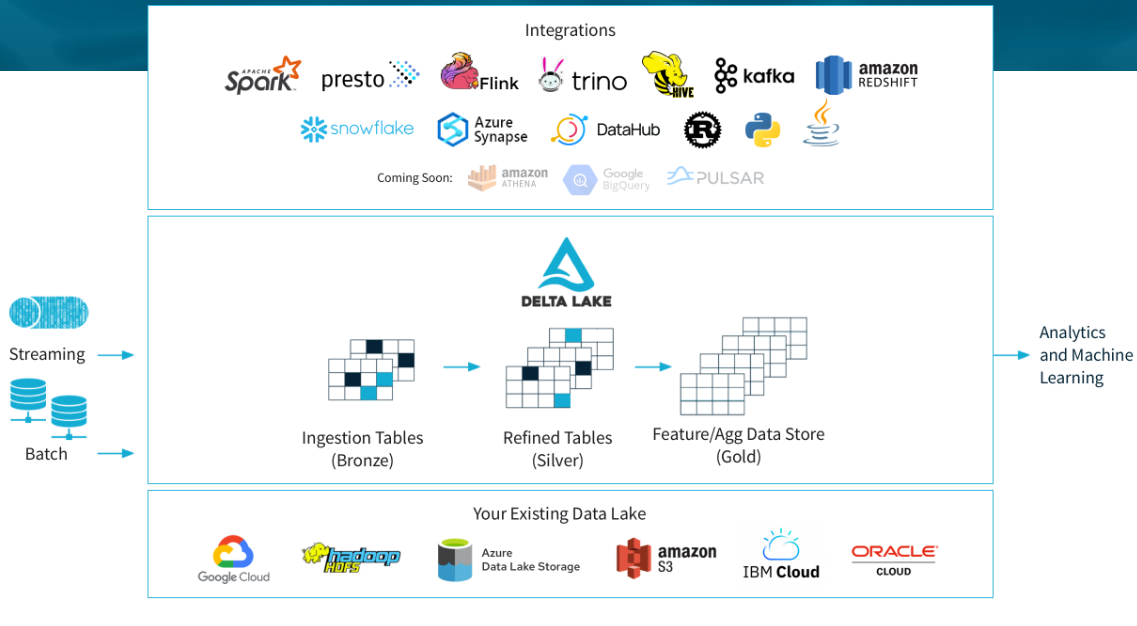

>Source: https://delta.io/

_Leitura adicional_

<a href="https://www.aiche.org/resources/publications/cep/2016/march/big-data-what-it?gclid=Cj0KCQiAic6eBhCoARIsANlox87axiEXNKvq8ry1vxBTKCz6ogJYd63yq_c1g4KRHLxnnvI5b8tJACoaAoFuEALw_wcB"> Big Data: What Is It? </a>

<a href="https://www.oracle.com/big-data/what-is-big-data/">Big data defined</a>

<a href="https://medium.com/@erkansirin/big-data-slowly-changing-dimension-type2-with-spark-and-delta-lake-79a89673f9f9">Big Data Slowly Changing Dimension Type2 with Spark and Delta Lake</a>

---

### Objetivo Geral


Propor a implmentação  SCD Type 2 em um Delta Lake via PySpark onde Data Lake 
armazenamento é Hadoop HDFS.Além disso, existe três abordagens ao extrair dados de banco de dados, que são **extração completa, extração transacional e extração delta**.Nessa mesma linha de trabalho, o projeto se propôs  usa a extração completa cuja o objetivo é **extrai todos os registros da tabela de origem. Isso geralmente se aplica a tabelas de tamanho pequeno a médio, por exemplo, tabela department.**


A figura ilustra o fluxo de execução da aplicação


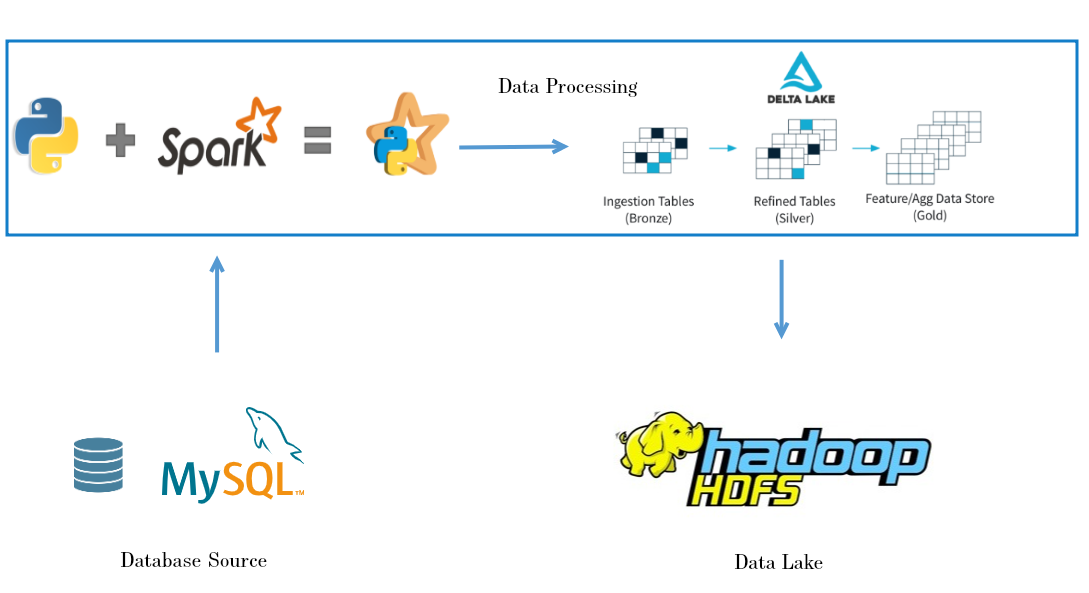

Portanto, a tabela de seleção para aplicação SCD Type 2 é o item vermelho selecionado na figura adiante.

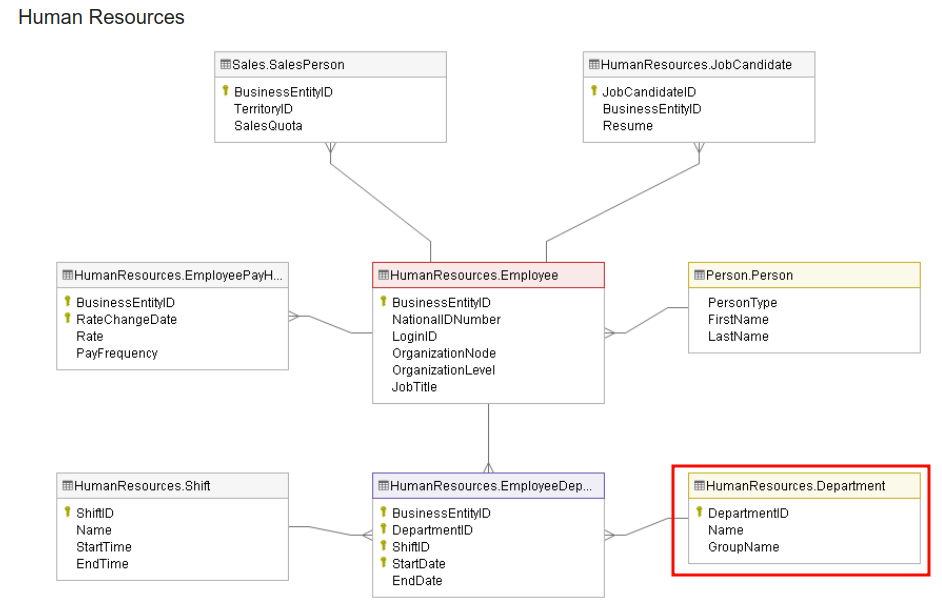

O AdventureWorks Database é um exemplo de produto da Microsoft para um banco de dados OLTP (processamento de transações online). O banco de dados AdventureWorks oferece suporte a uma empresa de fabricação multinacional fictícia chamada Adventure Works Cycles.

### Objetivos Específicos

De forma bem simples, para atender objetivo geral do projeto pretende-se ser abordado os seguintes tópicos:
    

A Primeira seção do projeto é composta por conceitos de Engenharia de Dados:

- Apresenta conceitos, característica Businnes Inteligence, Data Warehouse, Data Lake , Delta Lake and Data Lakehouse


A segunda parte é composta pelos mecanismos de computação:

- Aplicabilidade como mencanismo Mysql, Spark+PySpark, Delta Lake e Hadoop para implementação Compĺeta do Merge com dataTble via PySpark

---

### Resultados Alcançados


Antes de expôs os resultados atingidos, vamos simplifica os tipos SCDs existente atualmentem,em literaturas podemos encontra SDCs mais frequentes usadas entorno 2 a 4, mas existem 6 tipos diferentes, conforme mostra na tabela a seguir.

| SCD Type | Summary|
| --- | --- | 
| Type 0 | Ignore quaisquer alterações e audite as alterações. |
| Type 1 | Sobrescrever as alterações  |
| Type 2 | O histórico será adicionado como uma nova linha. |
| Type 3 | O histórico será adicionado como uma nova coluna.  |
| Type 4 | Uma nova dimensão será adicionada |
| Type 6 | Combinação de Tipo 2 e Tipo 3|

### Aplicabilidade SCD Type 2 merge completo com Delta Lake e Spark via PySpark

Então, o que é usado quando queremos manter o histórico? Com método SCD Type 2, **toda vez que houver uma alteração no sistema de origem, uma nova linha será adicionada à tabela do Data Warehouse. Na tabela resultante, haverá mais registros, mas o histórico anterior é mantido e pode ser consultado (Vega,2021).**

É importante analisar (Asanka,2021) destaca-se que SCD Type 2 no Data Warehouse é a **dimensão mais popular usada no Data Warehouse**.Do mesmo modo, em poucas palavras  Data Warehouse é usado para análise de dados. Se você precisar analisar dados, precisará acomodar os aspectos históricos dos dados.Por exemplo, vamos acompanhar como podemos implementar o SCD Type 2 usando como fonte de dados, banco de dados AdventureWorks cuja a table implementação é  **department**.

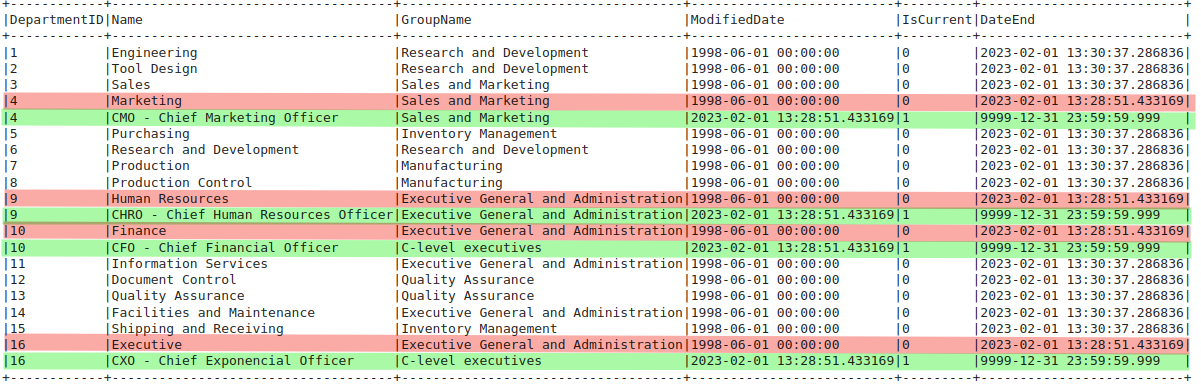


Podemos ver na table acima como **SCD Type 2 é implementada** dentro do Data Lake usando Delta lake + Spark. Bem como, está é a versão final da tabela de dimensões. De acordo com a implementação Type 2, **é garantido que os registros antigos permaneçam e os atualizados sejam adicionados com novas linhas.**


Observa o registro **cuja DepartmentID é 4** é a chave primaryKey da tabela. O **DepartmentID 4** no qual nome department é **Marketing indicado com cor vermelha, está sendo alterando para CMO - Chie Marketing Officer**. Da mesma forma, obeserva-se o registro no qual nome do Department  é **Finance** está sendo alterado para  **CFO Chief Finacial Officer** e grupo do deparment foi alterado para **C - leve Executives** neste caso ocorreu duas alterações nesse registro. Com essa informações adicionamos um nova linha com registro atual e assim mantemos um histórico da última versão.Esse mecanismo ajuda a preservar o aspecto histórico da tabela department

Vamos recapitular alguns ponto chave, SCD Type 2 rastreará o histórico de alterações. Geralmente é implementado para atributo **ModifiedDate** para indicar a data de início quando a alteração se torna efetiva, **IsCurrent** é sinalizador para indicar os registros ativos atuais. Porém, para implementa  SCD Type 2 de forma eficiente, precisamos adicionar alguns atributos que somado são três atributos, DateStar, EndDate e IsCurrent, observando que estamos usando ModifiedDate como data de início.Quando **DateEnd** é NULL ou igual a uma data alta como (9999-12-31), o registro é considerado a versão mais recente.


---


### Os objetivos e resultados-chave (OKRs)

Em resumo, o principal benefício SCD Type 2 é que o histórico de um registro **será mantido**, no entanto, esse tipo tem menos probabilidade de ser usado se houver a possibilidade de que a estrutura dos dados mude (por exemplo, novas colunas adicionadas a tabela) ou adicionar novas linhas à tabela aumenta o tamanho de forma que a tabela se torne incontrolável.Uma coisa a observar é que um merge COMPLETO ainda pode ser caro, pois precisa corresponder a toda a tabela de destino para descobrir as excluídas. 

Assim, de fato, um outro ponto importante é que  SCD Type 2 tem sido comum e, é importante entender como obter o registro atual de interesse. Uma consideração importante é se há um impacto nas condições de junção ao construir uma consulta SQL. Ao ingressar em uma tabela com SCD Type 2, será importante incluir o sinalizador de registro atual em suas condições de associação, caso contrário, seus resultados poderão ser distorcidos.

Neste projeto, tentamos fazer um exemplo simples de SCD Type 2 usando Spark e Delta Lake, e como Data Lake usamos hadoop para armazenamento da SCD.

_References_

https://www.sqlshack.com/implementing-slowly-changing-dimensions-scds-in-data-warehouses/

https://bcastudyguide.com/unit-1-businees-intelligence-and-business-decision/

https://towardsdatascience.com/data-analysts-primer-to-slowly-changing-dimensions-d087c8327e08


---

### <center>Part I Fundamentos</center>

### Businnes Inteligence, Data Warehouse, Data Lake, Delta Lake and Data Lakeouse

### Estrutura

Nesta seção, vamos discutir os seguinte tópicos a seguir.Antes disso, esses tópicos é ponto de partida  para real motivo de utiliza tecnologias de Big Date ao projeto e também projetos relacionados com grandes quantidade de dados.Como estamos na era da digitalização, o volume de dados gerados a partir de vários plataformas têm crescido continuamente. A rápida proliferação do volumes de dados impõe sérios desafios para pesquisadores de todo o mundo  para manusear e armazenar enorme quantidade de dads, é aí que entra em cena conceitos relacionados Data Warehousings;
   
- Sistema de Business Intelligence

- Sistemas : OLTP e OLAP

- O que é Data Warehouse

- O que é Data Lake

- O que é Delta Lake

- O que é Data Lakehouse


### Objetivo

Depois de ler essa seção, teremos capacidade de compreende:

- Detalhes da arquitetura de Data Warehouse

- Obtenha uma compreensão dos diferentes componentes para modelagem de Data Warehouse

- Entenda sobre o armazenamento open-source que traz transações ACID Delta Lake

- Entenda os surgimentos de novas arquitetura voltadas ao padrão ACID como Data Lakehouse

---

### Sistemas : OLTP e OLAP


- O OLTP "On-line Transaction Processing", é o termo usado para se 
referir aos sistemas transacionais, ou seja, os sistemas operacionais das 
organizações. 


- O OLAP "On-line Analytical Processing", trata da capacidade de analisar 
grandes volumes de informações nas mais diversas perspectivas dentro 
de um Data Warehouse .

A figura a seguir ilustra exemplo de um sistema de Business Intelligence usados na prática, conceito será  discutido a seguir.

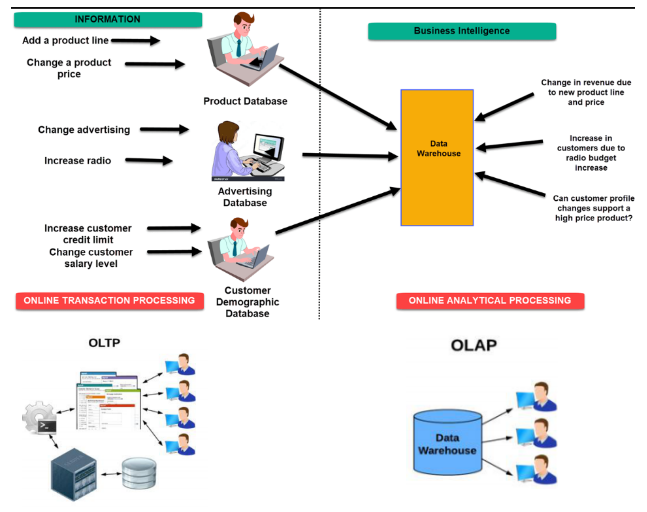

> Source Image: B.C.A STUDY adaptada


### Sistema de Business Intelligence - BI

Uma abordagem tradicional do sistema Business Intelligence  geralmente é composta por três componentes principais, conforme apresenta a figura a seguir.


> Componentes de uma solução de Business Intelligence

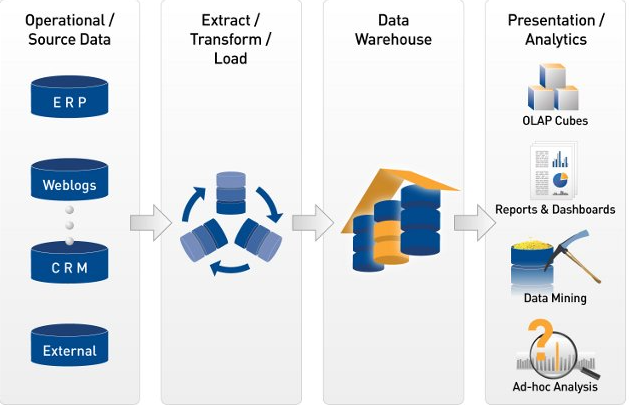

> Source: (Technology Innovation Management Review, 2009)

### O que é Business Intelligence ?

_" Uma plataforma estratégica de Business Intelligence coloca a informação certa nas mãos certas no momento certo e dá aos gerentes e executivos a capacidade de testar vários cenários para gastos e investimentos de negócios enquanto monitora importantes direcionadores operacionais do desempenho da empresa."_ (John Kemp , Benjamin Dietz , 2009)


De acordo (Technology Innovation Management Review, 2009) por meio das palavras do autor Hans Peter Luhn definiu BI pela primeira vez em seu artigo "A Business Intelligence System", publicado em outubro de 1958 no Journal IBM. Logo, então o mais recentemente, Howard Dresner, do Gartner Group, popularizou a seguinte definição para BI: _Um termo abrangente para descrever "conceitos e métodos para melhorar a tomada de decisões de negócios usando sistemas de suporte baseados em fatos"_


A figura a seguir ilustra os tipos de modelos dimensionais Star Schema X  SnowFlake Schema implementa em sistema de BI.

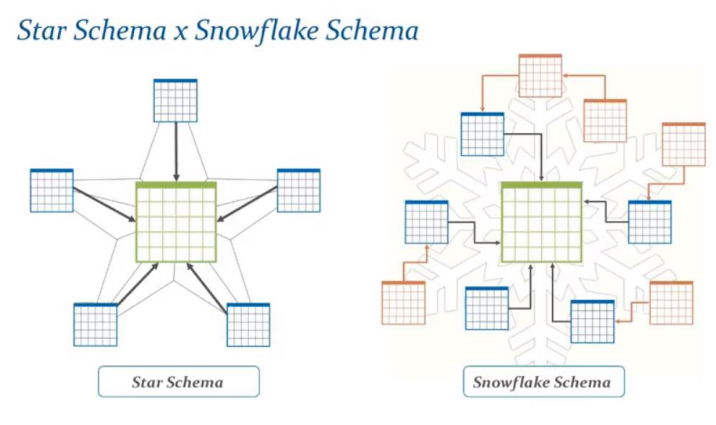

- O Modelo Estrela (Star)

> Modelo Estrela: Este modelo é chamado de estrela porque a tabela de 
fatos fica ao centro cercada das tabelas dimensionais assemelhado a 
uma estrela. No modelo estrela todas as tabelas relacionam-se 
diretamente com a tabela de fatos.

- O Modelo Floco de Neve (Snow Flake)

> Modelo Floco: as tabelas dimensionais relacionam-se com a tabela 
de fatos, mas algumas dimensões relacionam-se apenas entre elas, isto 
ocorre para fins de normalização das tabelas dimensionais, visando 
diminuir o espaço ocupado por estas tabelas, então informações como 
Categoria, Departamento e Marca tornaram-se tabelas de dimensões 
auxiliares


Vamos recapitular alguns pontos-chave dessa seção:

Em poucas palavras, BI é um conjunto de técnicas e ferramentas usadas para transformar dados em informações valiosas para a tomada de decisões de negócios, ou seja, é um sistema ao apoio a tomada de decisão inteligentes.

_References_


https://bcastudyguide.com/unit-1-businees-intelligence-and-business-decision/

https://timreview.ca/article/284

Senac - DBA curso Administrador de Banco de Dados

---

### Data Warehouse


Segundo (Mazumdar, 2022) refina que um Data Warehouse é um repositório que armazena centralmente dados de uma ou mais fontes distintas (por exemplo, bancos de dados de aplicativos, CRM, etc.). Os dados armazenados em um warehouse são estruturados, ou seja, de uma forma particular e em conformidade com o modelo de dados definido. Isso torna o processo de consumo de dados eficiente para aplicativos de BI downstream, pois eles geralmente lidam com dados bem organizados. A figura ilustra fluxo de um processo ETL sendo aplicado em Data Warehouse e seguinda permitem que analistas de negócios, engenheiros de dados e tomadores de decisão acessem dados por meio de ferramentas de BI, clientes SQL e outros aplicativos analíticos menos avançados (ou seja, não relacionados à ciência de dados).


- Open-Prem Data warehouse

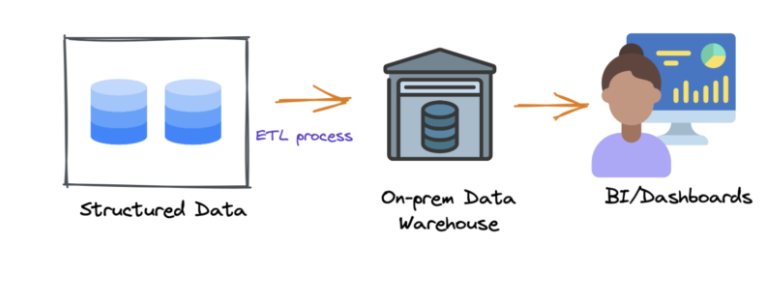


> Source: Mazumdar, 2022

Mediante o exposto, Data Warehouse é alimentado por meio de um processo ETL (Extrair - Transformar - Carregar) onde a coleta de dados na fonte (origem) (de sistemas operacionais, ERPs, CRMs, arquivos da web, bancos de dados, entre outros) passa por uma transformação ao ajustar as informações aplicando normas e posteriormente fazendo o upload desses dados para o Data Warehouse, disponibilizando-os para as equipes de análiticas da organização (empresa).

**Em outras palavras, na análise e computação de dados, ETL é o procedimento geral de copiar
dados de uma ou mais fontes em um sistema de destino que representa o
dados de forma diferente das fontes ou em um contexto diferente de
fontes).Nesse mesmo sentido, usufruiremos do Spark para torna o ETL possível e fácil para finalidade projeto. A figura a seguir reforça processo ETL em açao em um Data Warehouse** 

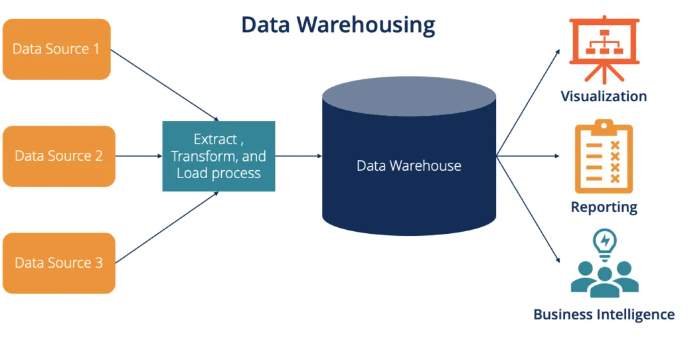

Source: (CFI Team, 2022)


Assim sendo, Data warehouse é uma mistura de tecnologia e componentes que permitem o uso estratégico dos dados. É a coleta eletrônica de um volume significativo de informações por uma organização destinada à consulta e análise e não ao processamento de transações. O Data Warehouse é um método de traduzir dados em informações e torná-los acessíveis aos consumidores em tempo hábil para fazer a diferença (CFI Team, 2022).

Vamos recapitular alguns pontos-chave dessa seção: 

Em poucas palavras, **Data Warehouse é coração do sistema de Business Intelligence**.Ou seja, é uma estrutura para armazenar **informações decisivas (gerenciamento para fornecer insights valiosos de negócios)**, usadas por uma variedade de ferramentas para gerar tabelas, gráficos e relatórios para apoiar a tomada de decisões; e também, um repositório de dados históricos relacionados significativo.


Além do mais, a aplicabilidade do Data Warehouse é utilizar todos os dados da empresa e armazenar dados históricos mantendo a autenticidade e a veracidade das informações  para análise de dados (termo-chave para sua finalidade), confrontando assim os fatos com o momento de sua ocorrência.



Vantagens da aplicabilidade:

- Permite que as empresas obtenham insights usando dados semi-recentes e históricos.As organizações investem em Data Warehouse devido à sua capacidade de fornecer rapidamente insights de negócios de toda a organização.

> Vantagem competitiva

> Aumento da produtividade dos tomadores de decisão

> Tomada de decisão econômica

- Os consumidores de dados (por exemplo, analistas) têm acesso mais fácil aos dados em vez de ter que acessar várias fontes diferentes

- Serve como uma única fonte de verdade  de confiabilidade, qualidade e governança dos dados

- Possui carga de dados incremental em intervalos regulares;

- Provê a base para uma solução de Business Intelligence

_References_

https://www.dremio.com/blog/what-is-a-data-lakehouse/

https://corporatefinanceinstitute.com/resources/business-intelligence/data-warehousing/

--- 

### Data Warehouse Modelling

É importante analisar as etapas que compõe a modelagem de um Data Warehouse, pois este é cerne da grande parte da evolução dos conceitos subjacentes interligados ao warehousing, bem como, envolve as seguintes etapas no processo de armazenamento de dados que são classificadas assim por (CFI Team, 2022):

- **Extração de dados:** Uma grande quantidade de dados é coletada de várias fontes.

- **Limpeza de dados:** Depois de compilados, os dados passam por um processo de limpeza. Os dados são verificados quanto a erros e qualquer erro encontrado é corrigido ou excluído.

- **Conversão de dados (transformação):**  Depois de limpos, o formato é alterado de banco de dados para um formato de warehouse.

- **Armazenamento em Data Warehouse:** Depois de convertidos para o formato warehouse, os dados armazenados em um warehouse passam por processos como consolidação e sumarização para facilitar e coordenar o uso. À medida que as fontes são atualizadas ao longo do tempo, mais dados são adicionados ao warehouse.

Dessa forma, depois entender fluxo design da arquitetura de Data Warehouse vamos analisar um exemplo peculiar de modelo dimensional **star schema** amplamente implementado em Data Warehouse tradicionais. 

Segundo (TAYGAN, 2022) afirma que no processo de  armazenamento de dados, uma abordagem comum para modelagem dimensional, uma abordagem comum para modelagem dimensional é por meio do conceito de esquema em **estrela (star schema)**, um agrupamento lógico de uma ou mais tabelas de fatos cercadas por tabelas de dimensões relacionadas, vinculadas por meio de relacionamentos de chave primária e estrangeira. Como pode ser visto na figura a seguir, o esquema em estrela deriva seu nome da representação física que se assemelha a uma forma de estrela, com a tabela de fatos em seu centro e as tabelas de dimensão ao redor representando os pontos das estrelas. Em um ambiente de dados (producão), os dados são iniciados em bancos de dados operacionais e os dados serão extraídos, transformados e carregados por meio de processo(ETL) no data warehouse para se adequar ao ambiente analítico.

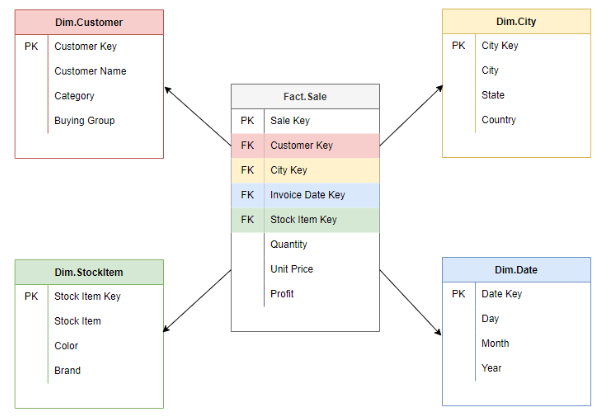

> Source Image: (TAYGAN, 2022)

Em resumo, recapitulando os tipos de modelos dimensionais

- As tabelas de **fatos** contêm medições e chaves estrangeiras que são referente às chaves primárias nas tabelas de dimensões associadas. Por exemplo, uma tabela de fatos de vendas pode incluir medidas como Quantidade, Preço unitário e Lucro.

- As tabelas de **dimensões** contêm uma coleção de atributos descritivos que categorizam fatos para permitir que os usuários respondam a perguntas de negócios. Dimensões de exemplo incluem Cliente, Item de Estoque e Data.

Vamos recapitular alguns pontos-chave dessa seção:

De acordo (CFI Team, 2022 ) refina que a análise de dados é usada para oferecer informações mais profundas sobre o desempenho de uma organização, comparando dados combinados de várias fontes de dados heterogêneas. Um data warehouse executa consultas e análises nos dados históricos obtidos de recursos transacionais.


Obseva-se que, a ideia de armazenamento de dados surgiram no conceito de programação  estrutura  introduzida em 1962, atráves de artigos escrito por E.W Dijkstra e C. Bohm/ G.Jacopini. Os dois últimos afirmavam que era possível  escrever qualquer  programa utilizando  os três compononetes  básicos: sequência, decisão e repetição.Eles  afirmavam que utilizando estes construtores, a programação se torna-se mais fácil de entender e manter.Assim surgiu o conceito (paradigma) de programação estrutura.

A partir desta ideais, no início da década de 1970, surgiram os sistema gerência de banco de dados (SGBD) com objetivo de ajudar (facilitar) a avaliar os dados mantidos em sistemas de banco de dados **relacional**, só então a partir da década 1980 ganhou notoriedade. Ele foi projetado para permitir que as empresas usem seus dados arquivados para ajudá-los a obter uma vantagem corporativa. O grande volume de dados em data centers vem de vários locais, como comunicações, vendas e finanças, aplicativos baseados em clientes e redes de parceiros externos (CFI Team, 2022).


De acordo (Databricks, 2020), os Data Warehouses têm uma longa história em aplicativos de suporte à decisão e Business Intelligence. Desde a sua criação no final da década 1980, a tecnologia de armazenamento de dados continuou a evoluir e as arquiteturas Massively Parallel
Processamento (MPP) levaram a sistemas capazes de lidar com tamanhos de dados maiores. Mas enquanto os warehouse eram ótimos para dados estruturados, muitas empresas modernas precisam lidar com dados **não estruturados, dados semiestruturados e dados com alta variedade, velocidade e volume.** Os Data Warehouses não são adequados para muitos desses casos de uso e certamente não são os mais econômicos.

À medida que as empresas começaram a coletar grandes quantidades de dados de várias fontes diferentes, **os arquitetos começaram a visualizar um único sistema para armazenar dados para muitos produtos analíticos e cargas de trabalho diferentes.** Cerca de uma década atrás, as empresas começaram a **construir data lakes  repositórios de dados brutos em vários formatos** (conceito que será discutido mais adiante). Embora adequados para armazenar dados, os data lakes carecem de alguns recursos críticos: **eles não oferecem suporte a transações, não reforçam a qualidade dos dados e sua falta de consistência/isolamento torna quase impossível misturar anexos e leituras e trabalhos em lote e streaming.** Por esses motivos, muitas das promessas dos data lakes não se concretizaram e, em muitos casos, levaram à perda de muitos dos benefícios dos Data Warehouses (Databricks, 2022)

A necessidade de um sistema flexível e de alto desempenho não diminuiu. As empresas exigem sistemas para diversos aplicativos de dados, incluindo análise SQL, monitoramento em tempo real, ciência de dados e aprendizado de máquina. A maioria dos avanços recentes em Inteligência Artificial foi em modelos melhores para processar dados não estruturados (texto, imagens, vídeo, áudio), mas esses são precisamente os tipos de dados para os quais um **data Warehouse não é otimizado**. Uma abordagem comum é usar vários sistemas- um data lake, vários Data Warehouses e outros sistemas especializados, como streaming, séries temporais, gráficos e bancos de dados de imagens. Ter uma infinidade de sistemas introduz complexidade e, mais importante, introduz atraso, pois os profissionais de dados invariavelmente precisam mover ou copiar dados entre sistemas diferentes.


Da mesma forma, quaisquer dados que são colocados no warehouse não mudam e não podem ser modificados porque o Data Warehouse analisa incidentes que ocorreram anteriormente concentrando-se nas mudanças nos dados ao longo do tempo. O armazenamento de dados deve ser feito para que os dados armazenados permaneçam seguros, confiáveis e possam ser facilmente recuperados e gerenciados.



_References_

https://www.databricks.com/blog/2020/01/30/what-is-a-data-lakehouse.html

https://www.taygan.co/blog/2022/03/21/slowly-changing-dimensions-scd

Projeto de banco de dados uma visão prática 11°Ed Felipe Machado e Mauricio Abreu

Projeto de Bando de Dados 6°Ed Carlos Alberto Heuser

---

### Data Lake 

De acordo com documentação do <a href="https://www-dremio-com.translate.goog/resources/guides/intro-data-lake-vs-data-warehouse/?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp">Dremio</a>, um data lake é uma solução de armazenamento centralizado para dados estruturados, semiestruturados e não estruturados. Praticamente qualquer tipo de dados pode residir em um data lake, e o lake pode ser dimensionado indefinidamente para atender às necessidades de uma empresa. Devido à capacidade de dimensionamento dos data lakes, eles geralmente contêm quantidades enormes, pense em petabytes de dados.As organizações podem armazenar tudo, desde dados relacionais a imagens e dados de clickstream dentro de um data lake. Realmente não há limites.

Nesse mesma linha de raciocínio, ao contrário dos Data Warehouses, que armazenam dados relacionais já “limpos”, um data lake armazena dados usando uma arquitetura plana e armazenamento de objetos em sua forma bruta. Os data lakes são flexíveis, duráveis e econômicos e permitem que as organizações obtenham informações avançadas de dados não estruturados, ao contrário dos Data Warehouses que lutam com dados nesse formato (Kutay, 2023).


Segundo (Mazumdar, 2022) destaca um ponto crucial sobre os problemas que as empresas estavam enfrentando com Data Warehouses e para **democratizar os dados para todos os tipos de cargas de trabalho analíticas**, surgiu um tipo diferente de plataforma de dados o data lake. Tudo começou com o armazenamento, gerenciamento e processamento de um grande volume de dados usando o ecossistema Hadoop local (por exemplo, HDFS para armazenamento, Hive para processamento). Os data lakes locais resolvem alguns dos problemas dos Data Warehouses de primeira geração, mas ainda apresentam desvantagens.

> On-prem data lake

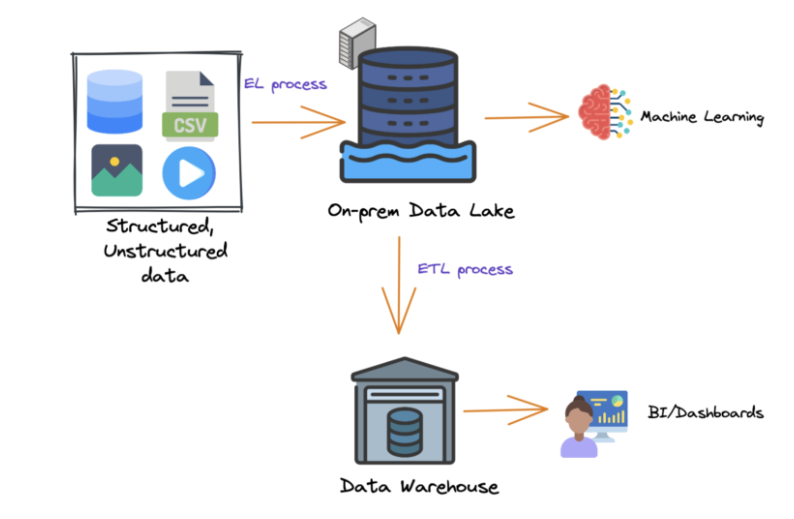

> Source: (Mazumdar, 2022)

Conforme a figura acima ilustra, em data lakes o esquema ou os dados não são definidos quando os dados são capturados; em vez disso, os dados são extraídos, carregados e transformados por meio de processo (ELT) para fins de análise. Os data lakes **permitem uso da Inteligência Artificial como aplicabilidade de sua subcategoria  de todo o campo do aprendizado de máquina e aprendizado profundo (a figura a seguir ilustra esses relacionamentos), e também concede análise preditiva usando ferramentas para vários tipos de dados de dispositivos IoT, mídias sociais e dados de streaming.**

> A relação entre Inteligência Artificial, aprendizado de máquina e aprendizado profundo

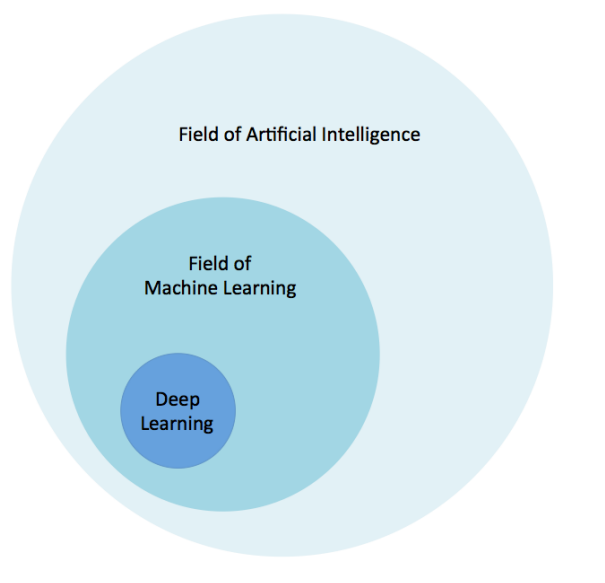

> Source: Deep Learning A PRACTITIONER'S APPROACH 2end Edition

Na era do Big Data, os data lakes desempenham um papel cada vez maior no acúmulo e gerenciamento de grandes quantidades de dados. O uso de data lakes em nuvem, em particular, está crescendo porque a infraestrutura em nuvem atende facilmente à necessidade de **escalabilidade, flexibilidade** e armazenamento de dados de baixo custo das organizações. Praticamente todos os setores do mundo corporativo, de departamentos de marketing a instituições financeiras, empresas de tecnologia corporativa e além, agora coletam grandes quantidades de dados de usuários, clientes e funcionários. Graças aos padrões abertos da maioria dos ambientes de data lake, os analistas de dados também têm acesso a várias ferramentas para executar os dados armazenados no data lake.O
Data lakes possuem vantagens e desvantagens gerais em comum, que são definidas por (Mazumdar, 2022) 


Vantagens aplicabilidade:

- Aborda os desafios de lidar com vários tipos de dados (estruturados, não estruturados) e o enorme volume de dados.

- Permite que várias cargas de trabalho analíticas sejam executadas diretamente nos dados que foram armazenados abertamente no HDFS.

- Ajuda a reduzir drasticamente os custos de data warehouses.


Desvantagens:

- Como a computação e o armazenamento estão interligados, isso resulta em problemas de escalabilidade à medida que as organizações amadurecem em sua jornada analítica.

- Governança ruim dos dados armazenados.

- Complexidade na pilha de ferramentas que requer conhecimento especializado de engenheiros de dados, o que resulta em tempo mais lento para insights


_References_

https://www.striim.com/blog/data-warehouse-vs-data-lake-vs-data-lakehouse-an-overview/

<a href="https://www-dremio-com.translate.goog/resources/guides/intro-data-lakes/?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp">Introduction to Data Lakes</a>

---

### Delta Lake

Segundo (Raymond, 2022) defende que um Delta Lake é uma estrutura de Big Data de armazenamento de open-source que oferece suporte à implementação da arquitetura Lakehouse.Tal que, funciona com mecanismos de computação como Spark, PrestoDB, Flink, Trino (Presto SQL) e Hive. Os arquivos no formato delta podem ser armazenados em armazenamentos em nuvem como GCS, Azure Data Lake Storage, AWS S3, HDFS, etc. Ele fornece APIs de programação para Scala, Java, Python, Rust e Ruby.

De acordo com a documentação <a href="https://docs.databricks.com/delta/index.html"> Databricks</a> abrange uma definição mais detalhada.Segundo a documentação, o Delta Lake é um software de código aberto que estende os arquivos de dados no formato Parquet com um log de transação baseado em arquivo para transações ACID e tratamento de metadados escalonável. O Delta Lake é totalmente compatível com as APIs do Apache Spark e foi desenvolvido para integração total com o streaming estruturado, permitindo que você use facilmente uma única cópia de dados para operações em lote e streaming e fornecendo processamento incremental em escala.

Observa-se que a documentação ressaltar que Delta Lake é o formato de armazenamento padrão para todas as operações no Azure Databricks. A menos que especificado de outra forma, todas as tabelas no Azure Databricks são tabelas Delta. A Databricks desenvolveu originalmente o protocolo Delta Lake e continua a contribuir ativamente para o projeto de código aberto. Muitas das otimizações e produtos na plataforma Databricks Lakehouse são construídas com base nas garantias fornecidas pelo Apache Spark e Delta Lake. Para obter informações sobre otimizações no Azure Databricks, consulte recomendações de otimização no Azure Databricks.

- Os principais recursos de um delta lake que são descrito pela Microsoft: confrome a figura ilustra

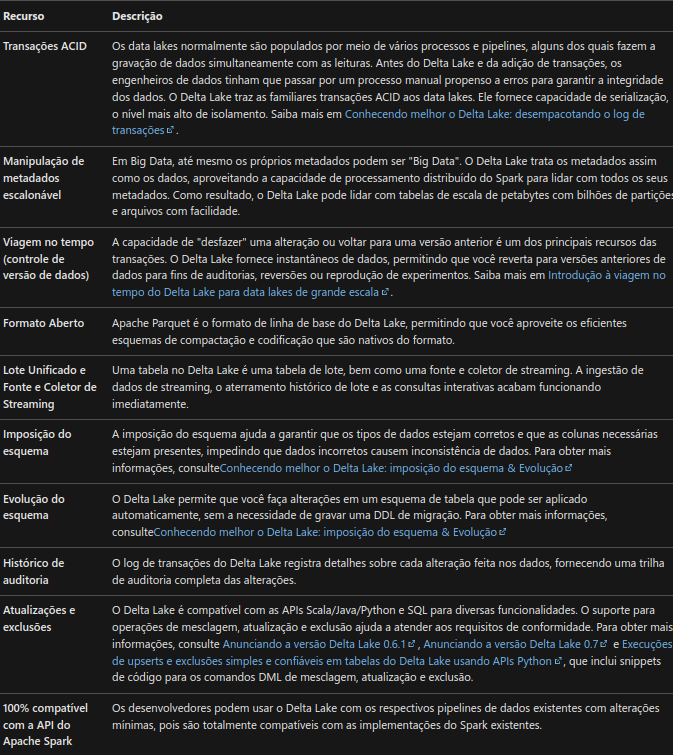

Vamos recapitular alguns pontos-chave dessa seção:
 
Em outras palavras, é uma camada de armazenamento open-source projetada para ser executada sobre um data lake existente e melhorar sua confiabilidade, segurança e desempenho. Ele oferece suporte a transações ACID, metadados escaláveis, streaming unificado e processamento de dados em lote para cargas de trabalho de Big Data.



*References*

https://delta.io/

https://learn.microsoft.com/pt-br/azure/synapse-analytics/spark/apache-spark-what-is-delta-lake#key-features

https://kontext.tech/article/1175/introduction-to-delta-lake-with-pyspark

<a href="https://www.hpe.com/us/en/what-is/delta-lake.html#:~:text=Delta%20Lake%20is%20an%20open,streaming%2C%20and%20batch%20data%20processing">What is Delta Lake?</a>

---

### Data Lakehouse

Um data lakehouse é uma nova arquitetura aberta de gerenciamento de dados que combina **flexibilidade, economia e escala de data lakes com o gerenciamento de dados e transações ACID de data warehouses, permitindo business intelligence (BI), ciência de dados e aprendizado de máquina (ML) em todos os dados** (Databricks, 2020).



### Data Lakehouse: Simplicidade, Flexibilidade e Baixo Custo

Mediante do exposto, como novos sistemas estão começando a surgir que abordam as limitações dos data lakes. Um lakehouse é uma arquitetura nova e aberta que combina os melhores elementos de **data lakes e data warehouses**. As Lakehouses são habilitadas por um novo design de sistema: implementação de estruturas de dados e recursos de gerenciamento de dados semelhantes aos de um **data warehouse diretamente sobre o armazenamento em nuvem de baixo custo em formatos abertos**. Eles são o que você obteria se tivesse que redesenhar data warehouses no mundo moderno, agora que o armazenamento barato é altamente confiável (na forma de armazenamentos de objetos) está disponível (Databricks, 2020).

Os data lakehouses também garantem que as equipes tenham os dados mais completos e atualizados disponíveis para projetos de ciência de dados, aprendizado de máquina e análise de negócios.A figura a seguir ilustra como é fluxo da operação do data lakehouse


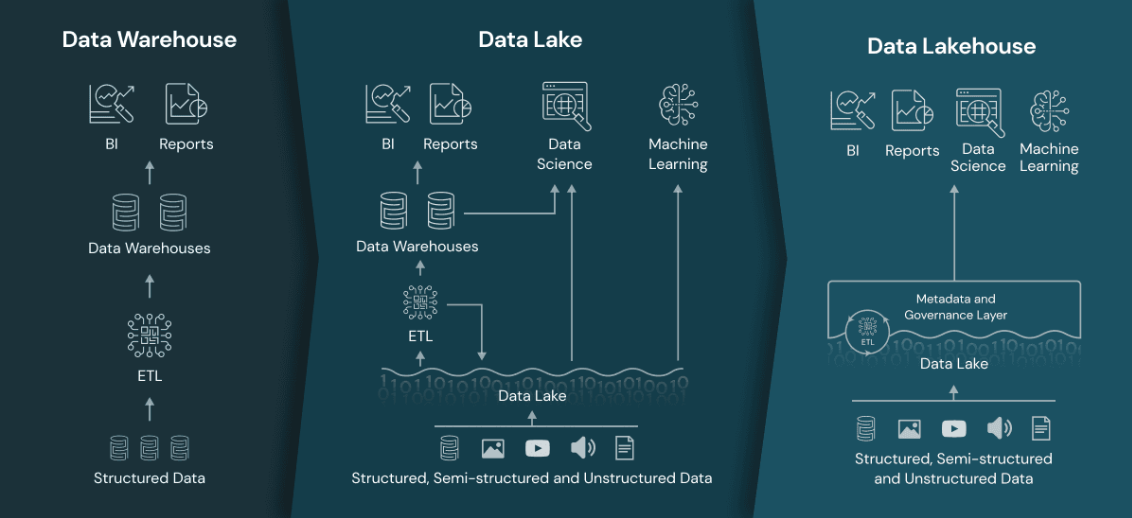

Source: (Databricks, 2020)


#### Alavancamento que iniciou o Data Lakehouse

Existem alguns avanços tecnológicos importantes que permitiram surgimento do data lakehouse, assim como, os elementos que afetaram esse surgimento segundo a documentação da Databricks:

- Camadas de metadados para data lakes

- Novos designs de mecanismo de consulta que fornecem execução SQL de alto desempenho em data lakes

- Acesso otimizado para ferramentas de ciência de dados e aprendizado de máquina.


Vantagens da aplicabilidade:

- Suporte à transação:

- Aplicação e governança do esquema:

- Suporte BI:

- O armazenamento é separado da computação:

- Suporte para diversos tipos de dados, desde dados não estruturados até dados estruturados:

- Suporte para diversas cargas de trabalho:

- Transmissão de ponta a ponta:


Portanto, esses são os principais atributos de Data Lakehouse. Os sistemas de nível empresarial requerem recursos adicionais. Ferramentas de segurança e controle de acesso são requisitos básicos. Os recursos de governança de dados, incluindo auditoria, retenção e linhagem, tornaram-se essenciais, especialmente à luz das recentes regulamentações de privacidade. Ferramentas que permitem a descoberta de dados, como catálogos de dados e métricas de uso de dados, também são necessárias. Com um lakehouse, esses recursos corporativos só precisam ser implementados, testados e administrados para um único sistema (Databricks, 2020).


_References_


https://www.databricks.com/glossary/data-lakehouse#:~:text=A%20data%20lakehouse%20is%20a,(ML)%20on%20all%20data

https://www.databricks.com/blog/2020/01/30/what-is-a-data-lakehouse.html

---

### História das Arquiteturas de Dados

#### Histórico sobre Data Warehouses

Os data warehouses têm uma longa história em aplicativos de suporte à decisão e inteligência de negócios, embora não fossem adequados ou fossem caros para lidar com dados não estruturados, dados semiestruturados e dados com alta variedade, velocidade e volume.

#### Surgimento de Data Lakes

Os data lakes surgiram para lidar com dados brutos em uma variedade de formatos em armazenamento barato para ciência de dados e aprendizado de máquina, embora carecessem de recursos críticos do mundo dos data warehouses: eles não oferecem suporte a transações, não reforçam a qualidade dos dados e sua falta de consistência/isolamento torna quase impossível misturar acréscimos e leituras, e trabalhos em lote e streaming.


#### Arquitetura de dados comum de duas camadas

Diante disso, as equipes de dados, consequentemente, juntam esses sistemas para habilitar **Bi e ML**  nos dados em ambos os sistemas, resultando em dados duplicados, custo extra de infraestrutura, desafios de segurança e custos operacionais significativos. Em uma arquitetura de dados de duas camadas, os dados são ETL  dos bancos de dados operacionais para um data lake. Esse lago armazena os dados de toda a empresa em armazenamento de objetos de baixo custo e é armazenado em um formato compatível com ferramentas comuns de aprendizado de máquina, mas muitas vezes não é bem organizado e mantido. Em seguida, um pequeno segmento dos dados de negócios críticos é ETLd novamente para ser carregado no data warehouse para inteligência de negócios e análise de dados. Devido a várias etapas de ETL, essa arquitetura de duas camadas requer manutenção regular e geralmente resulta em desatualização de dados, uma preocupação significativa de analistas e cientistas de dados, de acordo com pesquisas recentes da Kaggle e Fivetran. 

---

Conforme mencionamos ao longo dessas seções, conceitos fundamentais sobre sistemas de armazenamento de dados, esse conceitos fornece uma introdução de alto nível em engenharia de dados como escalabilidade, versatilidade e reutilização, cuja objetivo desse design de arquitetura de armazenamento de dados é usa em aplicações de Inteligência artificial.

Dessa forma, grande impacto em implementa um sistema de armazenamento de dados cuja ele seja Data Warehouse, Data Lake e Data Lakehouse, como objetivo de responde as seguinte perguntas sobre a análise de dados.A figura seguir mostra os quatro tipos de perguntas fundamentais de análise de dados: como diz o ditado uma imagem vale mais que mil palavras.

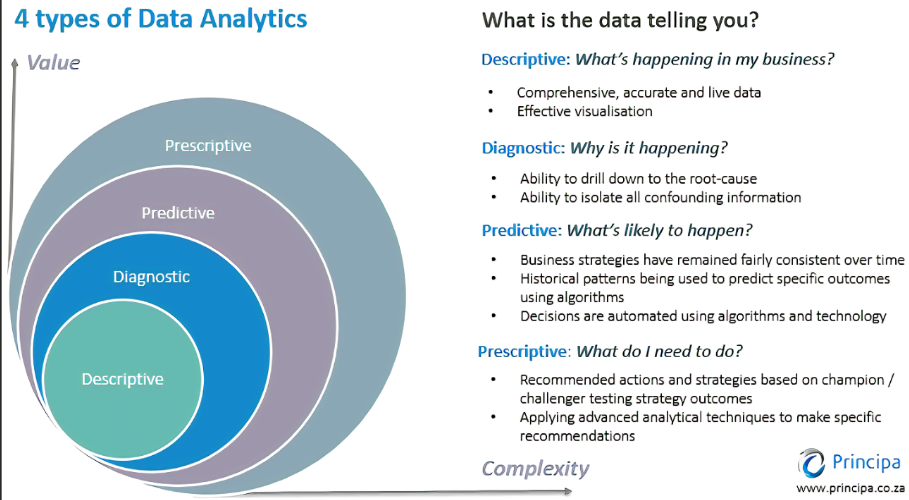

Em síntese, essas perguntas são interpretadas e usadas para ajudar as organizações a maximizar a eficiência da tomada de decisões em toda setores da organização aplicando soluções automatizadas mais inteligentes.Assim sendo, isso possibilita  um divisor de águas em capitalizar os avanços em Inteligência Artificial incorporando tecnologias, como aprendizado de máquina e aprendizado profundo.



_References_

https://www.databricks.com/glossary/data-lakehouse#:~:text=A%20data%20lakehouse%20is%20a,(ML)%20on%20all%20data.

https://www.kdnuggets.com/2017/07/4-types-data-analytics.html

---

### <center>Part II Aplicabilidade</center>

### Desenvolvimento da Implementing Slowly Changing Dimensions Type 2

### Mecanismos de computação

### Introdução ao Spark e PySpark

Segundo (Parsian, 2022) define o Spark como um **poderoso mecanismo de análise para processamento de dados em larga escala que visa velocidade, facilidade de uso e extensibilidade para aplicativos de Big Data**. É um tecnologia comprovada e amplamente adotada usada por muitas empresas que lidar com Big Data todos os dias. Embora a linguagem “nativa” do Spark seja Scala (mais do Spark é desenvolvido em Scala), também fornece APIs de alto nível em Java, Python e R.

Neste projeto, usaremos o Python via PySpark para implementa a SCD Type 2 em um Delta Lake e no Spark. No entanto, abordaremos conceitos sobre a API que expõe o
modelo de programação Spark para Python. Como Python sendo a 
linguagem de programação mais acessível e poderosa e expressiva do Spark API, a simplicidade do PySpark o torna a melhor escolha para construir as SCDs.PySpark é um
interface para Spark na linguagem de programação Python que fornece a
seguintes características importantes:

- Ele nos permite escrever aplicativos Spark usando APIs Python.

- Ele fornece o shell PySpark para analisar dados interativamente em um ambiente distribuído

O objetivo das próximas seções  é apresentar o PySpark como o principal componente
do ecossistema Spark e como ele pode ser usado efetivamente para grandes
tarefas de dados, como operações ETL, ML, entre outras. Antes disso, vamos nos aprofundar um pouco mais,por que o Spark é o melhor escolha para análise de dados, principalmente referente ao projeto.

_Leitura Adicional_

> De acordo (IBM) uma API, ou interface de programação de aplicativos, é um conjunto de regras definidas que permitem que diferentes aplicativos se comuniquem entre si. Ele atua como uma camada intermediária que processa transferências de dados entre sistemas, permitindo que as empresas abram seus dados e funcionalidades de aplicativos para desenvolvedores terceirizados externos, parceiros de negócios e departamentos internos de suas empresas.

> As definições e protocolos dentro de uma API ajudam as empresas a conectar os vários aplicativos diferentes que usam nas operações diárias, o que economiza tempo dos funcionários e elimina os silos que impedem a colaboração e a inovação. Para desenvolvedores, a documentação da API fornece a interface para comunicação entre aplicativos, simplificando a integração de aplicativos IBM,



_References_

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

https://spark.apache.org/

https://www.ibm.com/topics/api

---

### Por que Spark para análise de dados

O Spark é um poderoso mecanismo de análise que pode ser usado para dados em larga escala
em processamento. As razões mais importantes para usar o Spark são definidas por (Parsian, 2022) como:

- O Spark é simples, poderoso e rápido.

- O Spark é gratuito e de código aberto.

- O Spark é executado em qualquer lugar (<a href="https://hadoop.apache.org/">Hadoop</a>, <a href="https://mesos.apache.org/">Mesos</a>, <a href="https://kubernetes.io/">Kubernetes</a>, Standalone   ou na nuvem).

- O Spark pode ler/gravar dados d/para qualquer fonte de dados (Amazon S3, Hadoop HDFS, bancos de dados relacionais, etc.).

- O Spark pode ser integrado a praticamente qualquer aplilcação de análise dados.

- O Spark pode ler/gravar dados em formatos baseados em linhas (como Avro) e em colunas (como Parquet e ORC).

- O Spark possui um conjunto rico, mas simples, de APIs para todos os tipos de processos ETL.

Sob mesmo ponto de vista, tal que nos últimos cinco anos, o Spark vem progrediu de tal forma  penso que ele 
pode ser usado para resolver **grande parte dos problemas relacionado ao  Big Data**. O que estamos presenciando atualmente é um nova geração de empresas que esta expandindo  e gerando  valor em um  ritmo nunca visto antes no mundo dos negócios.Isso é suportado pelo fato de que todas as empresas de Big Data, como Facebook, Illumina, IBM e Google, usam Spark todos os dias em sistemas de produção.Ou seja, estamos em uma transição de nova revolução industrial.Se os sistemas de armazenamentos de dados de baixo custo é vapor dessa revolução, os dados são o seu carvão: a matéria-prima que alimenta os warehousing, sem a qual nada seria possível.

Além do mais, quando se trata de dados, e além do progresso exponencial do hardware de armazenamento nos últimos 20 anos (seguindo a <a href="https://en.wikipedia.org/wiki/Moore%27s_law">lei de Moore</a>), o divisor de águas foi a ascensão da internet, tornando viável
para coletar e distribuir conjuntos de dados muito grandes para aprendizado de máquina. Hoje, grandes empresas
trabalhar com conjuntos de dados de imagem, sensores IoT, logs de servidores, vídeos, dados de linguagem natural e entre outros, isso não poderiam.Bem vindo novo mundo das grandes empresas de Big Data que usa como vapor os Data Warehousing.


**Nesta mesma linha de trabalho, o Spark é uma das melhores escolhas para processamento de dados em larga escala e para
resolvendo problemas <a href="https://www.ibm.com/docs/en/netezza?topic=guide-mapreduce-paradigm"> MapReduce</a> e além disso, ele permite o desbloqueio do poder dos dados
lidando com Big Data com APIs poderosas e alta performance. Usando
MapReduce/Hadoop para resolver problemas de Big Data, seria muito complexo  para nós
escrever uma tonelada de código de baixo nível para resolver até mesmo problemas primitivos, isso é
onde entra o poder e a simplicidade do Spark. Apache Spark é
consideravelmente mais rápido que o Apache Hadoop porque usa cache na memória
e execução otimizada para desempenho rápido, e suporta lote geral
processamento, análise de streaming, aprendizado de máquina, algoritmos de gráfico e
consultas SQL.** (Parsian, 2022)


Ainda mais, para o PySpark, o Spark tem duas abstrações de dados fundamentais: o RDD e o
 DataFrame.Analogamente um RDD é **um conjunto de elementos do mesmo tipo** e um DataFrame é uma **tabela de linhas com colunas nomeadas**; isso permite que temos uma estrutura e um
coleta distribuída de dados, permitindo abstração de alto nível. uma vez que seu
dados são representados como um RDD ou um DataFrame, podemos pode aplicar
funções de transformação (como mapeadores, filtros e redutores) nele para transforma os dados na forma desejada para objetivo final .


Mediante disso, observamos que Spark é por natureza distribuído e paralelo: seus dados de entrada são
particionado e pode ser processado por transformações (como mapeadores,
filtros e redutores) em paralelo em um ambiente de <a href="https://www.suse.com/suse-defines/definition/computer-cluster/#:~:text=A%20computer%20cluster%20is%20a,same%20task%20to%20each%20node.">cluster</a>. Em outras palavras, para
resolver um problema de análise de dados no PySpark, você lê os dados e os representa como
um RDD ou DataFrame (dependendo da natureza do formato dos dados), então
escreva um conjunto de transformações para converter seus dados na saída desejada.
O Spark particiona automaticamente seus DataFrames e RDDs e organiza
as partições em diferentes nodes do cluster. As partições são as unidades básicas de
paralelismo no Spark.O paralelismo é o que permite aos desenvolvedores executar tarefas
em centenas de servidores em um cluster em paralelo e de forma independente.
**Uma partição no Spark é um pedaço (uma divisão lógica) de dados armazenados em um node
no cluster. DataFrames e RDDs são coleções de partições. Spark tem
um particionador de dados padrão para RDDs e DataFrames, mas podemos  substituir
esse particionamento com uma própria programação personalizada (Parsian, 2022).**

A seguir, vamos nos aprofundar um pouco mais no ecossistema e na arquitetura do Spark.


_References_

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

---

### O ecossistema do Spark

O ecossistema do Spark é apresentado na figura a seguir. Antes disso, o spark tem três componentes principais, que são classificados por (Parsian, 2022) como:

- Environments

> O Spark pode ser executado em qualquer lugar e se integra bem com outros ambientes.

- Applications

> Spark integra-se bem com uma variedade de plataformas de Big Data e
formulários.

- Data sources

> O Spark pode ler e gravar dados d/para muitas fontes de dados.

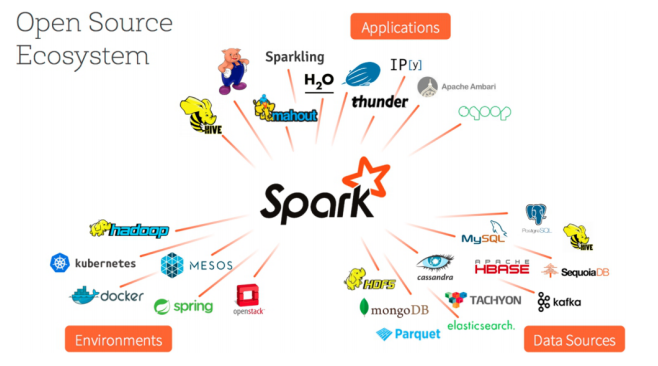

Source: (Parsian, 2022)

Observa-se que, (Parsian, 2022) destaca-se que  amplo ecossistema do Spark torna o PySpark uma ótima **ferramenta para ETL**, análise de dados e muitas outras tarefas. Com o PySpark, podemos ler dados de muitos
diferentes fontes de dados (sistema de arquivos Linux, Amazon S3, Hadoop
Sistema de arquivos distribuídos, tabelas relacionais, MongoDB, Elasticsearch, Parquet
arquivos, etc.) e representá-lo como uma abstração de dados do Spark, como RDDs ou
DataFrames. Uma vez que seus dados estejam nesse formulário, você pode usar uma série de simples
e poderosas transformações que Spark fornecer para transformar os dados no formato desejado. Por exemplo, você pode usar a transformação filter()
para descartar registros indesejados, use groupByKey() para agrupar seus dados por seu
chave desejada e, finalmente, use a transformação mapValues() para executar
agregação final (como encontrar média, mediana e desvio padrão
de números) nos dados agrupados.Todas essas transformações são muito
possível usando a simples, mas poderosa API PySpark.


_References_

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

---

### Arquitetura do Spark

> *"O sucesso parece estar conectado com a ação. Pessoas de sucesso se mantêm em movimento. Elas cometem erros, mas não desistem.”* - Conrad Hilton 

Então, quando temos  poucos dados, é possível analisá-los com um único
computador em um período razoável de tempo. Quando você tem grandes volumes de
dados, usando um único computador para analisar e processar esses dados (e armazená-los) 
pode ser muito lento, se não até mesmo impossível. É por isso que queremos usar
Spark asssociado a isso para tal finalidade.

O Spark tem uma biblioteca principal e um conjunto de bibliotecas integradas (SQL, GraphX, Streaming, MLlib), conforme mostrado na figura a seguir. Dessa forma, podemos ver, através de sua API DataSource, o Spark pode interagir com muitas fontes de dados, como Hadoop, HBase, Amazon S3, Elasticsearch e MySQL, para citar alguns (Parsian, 2022).

A figura apresenta os componentes do Spark que integra seu ecossistema que são úteis para torna os dados significativos:

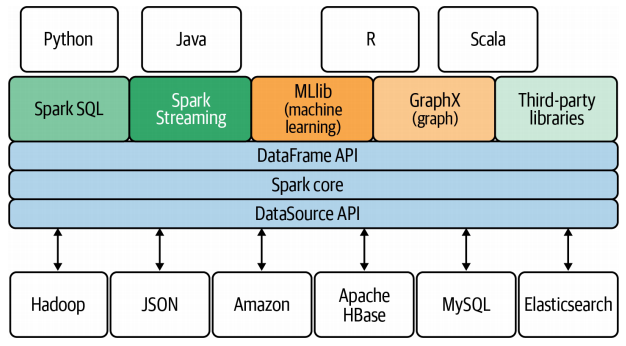

Esta figura mostra o verdadeiro poder do Spark: podemos usar várias
languagens para escrever aplicativos Spark e, em seguida, usar bibliotecas avançadas para resolver
diversos problemas de Big Data. Enquanto isso, podemos ler/escrever dados de um
variedade (diferentes) de fontes de dados.

### Termos-chaves

Para entender a arquitetura do Spark, precisamos  entender alguns dos principais
termos que são definido por (Parsian, 2022) como:
    
- SparkSession

> A classe SparkSession, definida no pacote pyspark.sql, é a
ponto de entrada para programar o Spark com Dataset e DataFrame 
APIs. Para fazer algo útil com um cluster Spark, primeiro você precisa para criar uma instância desta classe, que lhe dá acesso a uma instância
do SparkContext.

>> Em outras palavras, o SparkSession é o ponto de entrada para trabalhar com RDD e DataFrame no Spark, ou seja, para realizar o processamento de dados.


>>> O PySpark possui uma API abrangente (composta de pacotes, módulos, classes e
métodos) para acessar a API do Spark. É importante observar que todas as APIs, pacotes, módulos, classes e métodos discutidos nesta introdução são  específicos do PySpark. Por exemplo, quando referimos à classe SparkContext, estou me referindo a classe Python pyspark.SparkContext, definida no pacote pyspark, e quando eu consultar a classe SparkSession, estaremos referindo ao pyspark.sql.SparkSession da Classe Python, definida no módulo pyspark.sql


- SparkContext

> A classe SparkContext, definida no pacote pyspark, é a principal
ponto de entrada para a funcionalidade do Spark. Um SparkContext mantém uma conexão
ao gerenciador de cluster Spark e pode ser usado para criar RDDs e
variáveis de transmissão no cluster. Ao criar uma instância de
SparkSession, o SparkContext fica disponível dentro do sua
sessão como um atributo, SparkSession.sparkContext.

>> SparkContext é a principal ponto de entrada para a funcionalidade do Spark.
Um SparkContext representa a conexão com um cluster Spark,
e pode ser usado para criar RDD (a principal abstração de dados para
Spark) e variáveis broadcast (estruturas e coleções de dados compartilhados como o tipo global somente leitura de variáveis) nesse cluster.

>>> Em poucas palavras, o SparkContext é basicamente uma espécie de cliente que estabelece a conexão com o ambiente de execução do Spark e age como o processo principal da sua aplicação.É o coração da aplicação Spark.

- Driver

> Todos os aplicativos Spark (incluindo o shell PySpark e
Programas Python do tipo standalone) são executados como conjuntos independentes de processos. Esses processos são coordenados por um SparkContext em um programa de driver. Para enviar um programa Python autônomo para Spark, você precisa escrever um programa de driver com a API PySpark (ou Java ou Scala). Este programa é responsável pelo processo em execução da função main() do aplicativo e
criando o SparkContext. Também pode ser usado para criar RDDs e DataFrames.

>> O SparkDriver é um processo que roda na sua própira máquina virtual java e que é  responsável pelo SparkContext. **O Spark driver é o que podemos chamar de centro de operações,  pois ele quem dispara os jobs e as tarefas que serão executadas nos workers e gerenciados pelo  Master (cluster manager).**

>>> O SparkDriver é responsável pelo SparkContext para cada aplicação Spark. **O SparkDriver  é responsável por diversas tarefas, tais como cache manager, security manager, memory  manager, etc…Um SparkDriver nada mais é que um aplicativo (escrito em Java, Scala, Python ou  R) que usa Spark como uma biblioteca. Ele fornece o código de processamento de dados que o  Spark executa em cada node do cluster.**

>>>> Um SparkDriver pode inciar um ou mais trabalhos em  um cluster Spark (que são os jobs). O SparkDriver inicia um job, que será executado nos  workers e gerenciado pelo cluster manager, que controla e coordena todas as operações  paralelas no cluster. Portanto,**cada execução do Sparkdriver é um job.**


- Worker  (trabalhadores)

> Em um ambiente de cluster Spark, existem dois tipos de nodes: um (ou
dois, para alta disponibilidade) para **Master** e um conjunto de **Workers**. Um worker é qualquer node que pode executar programas no cluster. Se um processo for iniciado para um aplicativo, então este aplicativo adquire executores em nodes worker, que são responsáveis pela execução das tarefas do Spark.


>> **Em outras palavras, um worker é um computador (host ou node) e quem fornece CPU, memória e recursos  de armazenamento para uma aplicação Spark. Os workers executam as aplicações Spark**.Em resumo, cada worker é na verdade um computador em um cluster de computadores, ou  simplesmente um node. Cada node possui um processo chamado **executor**, que por sua vez  executa tasks, tarefas. Tudo isso é gerenciado por um computador chamado Master ou Cluster  Manager.

- Cluster manager

> O node "Master" é conhecido como gerenciador do cluster. A função principal
deste node é gerenciar o ambiente de cluster e os servidores que
o Spark aproveitará para executar tarefas. O gerenciador do cluster aloca
recursos para cada aplicação. O Spark oferece suporte a cinco tipos de cluster
gerentes, dependendo de onde está sendo executado.

>> 1. Standalone(próprio ambiente em cluster integrado do Spark)
>> 2. Mesos (um kernel de sistemas distribuídos)
>> 3. Hadoop YARN
>> 4. Kubernetes
>> 5. Amazon EC2

>>> Conforme discutido anteriormente, o Spark utiliza uma arquitetura Master/Worker. Existe o driver program que coordena o  que chamamos de master. **O Master é o chefe que por sua vez, gerencia os workers e cada um possui um executor. Nada muito diferente da vida real**

>>>> Embora o uso da terminologia Master/Worker esteja obsoleto e sendo aposentado em muitos softwares em contextos, ainda faz parte da funcionalidade do Apache Spark.

De acordo com o conceito da arquitetura Spark discutido anteriormente, a fim de reduzir o peso do texto, a figura a seguir ilustra o processo de execução da arquitetura uma visão geral sobre o seu design.

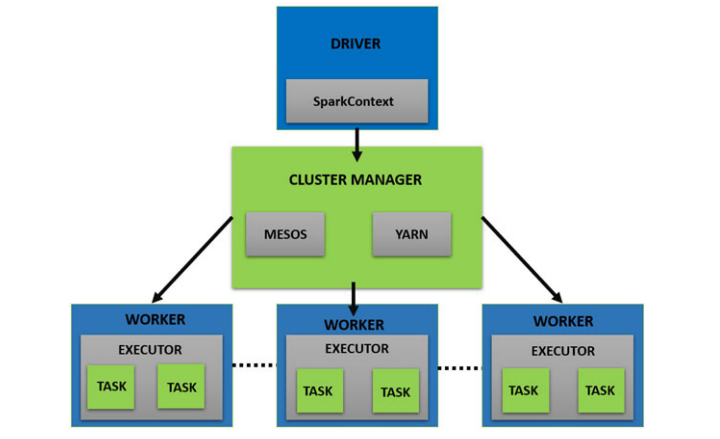

> Source: (Gourav, Manish, Inder Singh , 2022)

Seguindo análise (Gourav, Manish, Inder Singh , 2022) delinear uma arquitetura do Apache Spark  consiste em cinco
componentes, tais como, **Task Runner, Spark Driver, Worker Node, Executor e
Clusters Manager**; isso pode ajudar a executar um aplicativo do Spark de maneira impecável.A primeira e mais importante etapa é o fluxo de execução iniciado no SparkDriver
que chama o **programa principal e gera um SparkContext**. Um SparkContext é um
guia de um aplicativo que geralmente consiste em todas as 
funcionalidades.Por outro lado, o SparkDriver tem muitos outros importantes
**agendadores e gerenciadores**, como agendador DAG, agendador de tarefas, back-end
**agendador e gerenciador de blocos**. Esses componentes mencionados anteriormente são
útil para traduzir o código escrito pelo usuário em um trabalho que executa dentro do
cluster. Além disso, o monitoramento e alocação de recursos podem ser possíveis com
a ajuda do SparkDriver e do SparkContext. Existem duas maneiras pertinentes de
obter alocação de recurso dentro do cluster usando Mesos e Yarn uns dos principais usados.Quando um
o RDD é criado, pode ser alimentado a muitos nodes de workers para executar as tarefas
atribuído pelo Cluster Manager e enviar de volta a resposta para o SparkContext. Por fim, o executor cuida da responsabilidade de executar a
tarefas que residem no node do worker.


Esta seção desmistifica os conceitos fundamentais por trás da arquitetura do Spark, concentrando-se nos principais componentes do Spark que facilitam a implementação de aplicativos desenvolvidos pelos  desenvolvedores conforme a sua necessidade.Deste modo, na seção adiante vamos reforça ainda mais arquitetura do spark em poucas palavras e em seguinda arquitetura do PySpark.


_References_

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

Practical Machine Learning with Spark

---

### Arquitetura Spark em poucas palavras

Segundo (Parsian, 2022) refina uma visão de alto nível da arquitetura Spark é apresentada na figura adiante. No entanto, um cluster Spark é composto por um node master (o “cluster
manager”), que é responsável por gerenciar aplicativos Spark, e um conjunto de nodes “worker” (executores), que são responsáveis por executar tarefas
enviados pelos aplicativos Spark (seus aplicativos, que você deseja ser
executado no cluster Spark).

> Arquitetura do Spark 

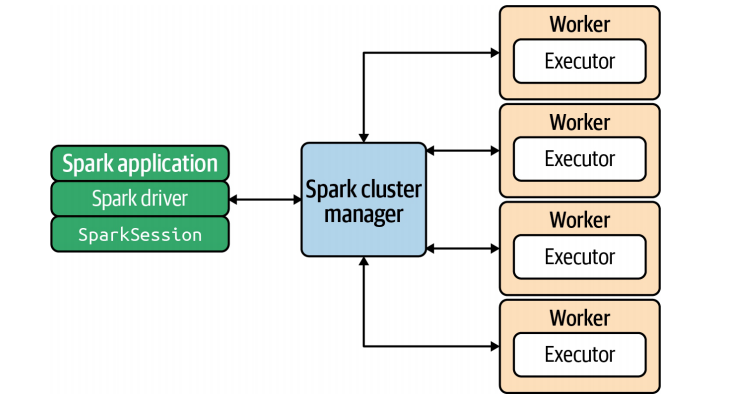

> Source: (Parsian, 2022)


Nesse sentido, (Parsian, 2022) afirma que dependendo do ambiente em que o Spark está sendo executado, o gerenciador do cluster
o gerenciamento desse cluster de servidores será o cluster standalone do Spark
manager, Kubernetes, Hadoop YARN ou Mesos. Quando o cluster do Spark esta
em execução, você pode enviar aplicativos do Spark para o gerenciador do cluster, que
concederá recursos à sua inscrição para que você possa concluir suas análises de dados.


O spark possuem caraterística gerais em comum que são:

- Spark

> Uma instância de SparkSession, ideal para criar DataFrames

- sc

> Uma instância do SparkContext, que é ideal para criar RDDs

Deste modo, se escrevermos um aplicativo PySpark independente (um driver Python, que
usa a API PySpark), então podemos  criar explicitamente uma instância de
SparkSession. Uma SparkSession pode ser usada para:

- Criar DataFrames

- Registrar DataFrames como tabelas

- Execute SQL sobre tabelas e tabelas de cache

- Ler/escrever texto, CSV, JSON, Parquet e outros formatos de arquivo

- Ler/gravar tabelas de banco de dados relacional

Vamos recapitular alguns pontos-chave dessa seção e da seção anterior:


O SparkContext fornece acesso as funcionalidades. Tudo que você fizer no Spark, será  feito por meio de um SparkContext. Ele representa uma conexão para o cluster, sendo usado para  criar RDD’s ou Dataframes, particionar e distribuir os RDD pelo cluster e gerenciar os executors. **O SparkContext então coleta os resultados e apresenta para o SparkDriver. Ou seja, o SparkContext é a ligação entre o Driver Program (a aplicação que você escreveu em alguma linguagem de programação) e o cluster Spark.**

O Spark utiliza um gerenciador de clusters para adquirir recursos de cluster para a  execução de um job. Um cluster manager, como o nome indica, gerencia recursos de computação  em um cluster de diversos nodes. Ele fornece a programação de baixo nível de recursos de cluster  em todos os aplicativos. Ele permite que vários aplicativos possam compartilhar recursos do cluster. É possível utilizar diferentes tipos de cluster manager com Spark, tal como Mesos ou YARN uns dos principais usados no mercado, que também é usado pelo Hadoop.

Um executor é um processo JVM (Java Virtual Machine) que o Spark cria em cada **worker**  para uma aplicação. Ele executa o código do aplicativo simultaneamente em vários segmentos, ou seja, de forma paralela. Ele também pode armazenar os dados em cache na memória ou disco.**Um executor tem o mesmo tempo de vida que a aplicação para o qual foi criado (ou seja, ele nada mais é do que um processo criado para execução do job. Quando o job termina, o processo também termina).**

Uma tarefa é a menor unidade de trabalho que o Spark envia para um executor. Cada tarefa executa alguns cálculos, que retornam um resultado para um SparkDriver. O Spark cria  uma tarefa para cada partição de dados (um RDD, o conjunto de dados que vc criou, pode ser  particionado para execução em paralelo). **Um processo executor pode executar uma ou mais  tarefas simultaneamente. A quantidade de paralelismo é determinada pelo número de partições.  Mais partições significam mais dados de processamento de tarefas em paralelo.**


Existe claro uma relação entre todos os processos, que podem estar sendo executados  em uma mesma máquina ou em diversas máquinas em um cluster. Em resumo, você define um  SparkDriver, que usa um SparkContext para conectar aos serviços do cluster. **O SparkDriver  envia jobs que são trabalhos de análise de dados por exemplo, que serão processados nos  workers. Cada worker possui um serviço executor, que pode processar uma ou mais tarefas em 
paralelo**. A gestão do cluster e da comunicação entre os nodes é feita pelo cluster manager. Ao  fim da execucão das tarefas, os workers comunicam com SparkContext que então apresenta o 
resultado ao SparkDriver. Esse é o resultado que por exemplo você vê quando executa um comando no console do Spark ou via PySpark.


Assim sendo, agora temos conhecimento básicos sobre desgin da arquitetura do Spark, na seção a seguir vamos examinar um pouca mais PySpark.


_References_

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

Practical Machine Learning with Spark

https://freecontent.manning.com/concurrency-vs-parallelism/#:~:text=Concurrency%20is%20about%20multiple%20tasks,resources%20like%20multi%2Dcore%20processor.

https://www.datascienceacademy.com.br/course/analise-de-dados-com-python

---

### O poder do PySpark

De acordo (Databricks) o Apache Spark é escrito na linguagem de programação Scala. O PySpark foi lançado para oferecer suporte à colaboração do Apache Spark e Python; na verdade, é uma API Python para Spark. Além disso, o PySpark ajuda você a interagir com conjuntos de dados distribuídos resilientes (RDDs) na linguagem de programação Apache Spark e Python. Isso foi alcançado aproveitando a biblioteca Py4j. PySpark Py4J é uma popular.

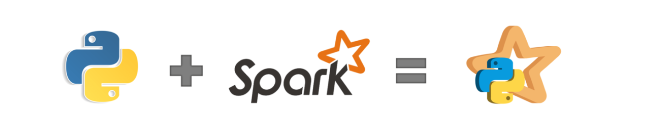

> Source: Databricks

Em poucas palavras, é um ecossistema completo que pode lidar com dados complexos com suporte para RDDs, DataFrames, GraphFrames, MLlib, SQL, e muito mais.

_References_

https://www.databricks.com/glossary/pyspark

https://pypi.org/project/pyspark/

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

---

### Arquitetura PySpark

Seguindo análise (Parsian, 2022) o PySpark é construído sobre a API Java do Spark. Os dados são processados em Python e armazenado em cache/embaralhado na Java Virtual Machine, ou JVM. Uma visão de alto nível do PySpark.A arquitetura é apresentada na figura a seguir.

> Arquitetura PySpark

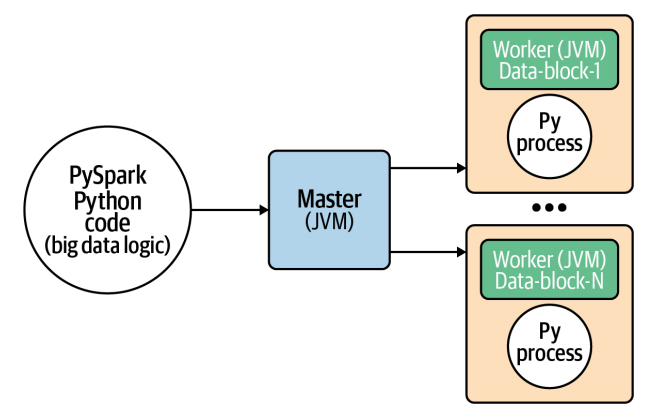

Além disso, o fluxo de dados do PySpark é ilustrado na figura a seguir



> Source: (Parsian, 2022)

Nessta mesma linha de trabalho (Parsian, 2022) ressaltar que no programa de driver Python (seu aplicativo Spark em Python), o SparkContext usa Py4J para iniciar uma JVM, criando um JavaSparkContext. Py4J é usado apenas no driver para comunicação local entre o Python e objetos JavaSparkContext; grandes transferências de dados são realizadas através de um mecanismo diferente. As transformações RDD em Python são mapeadas para transformações em objetos PythonRDD em Java. Em máquinas de trabalho remotas (nuvem), objetos PythonRDD iniciam subprocessos Python e se comunicam  usando pipelines, enviando o código do usuário e os dados a serem processados.

_References_

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

---

### Relational Databases

Em primeira análise, vamos começar com bancos de dados relacionais. Um banco de dados relacional é uma coleção de
itens de dados organizados como um conjunto de tabelas formalmente descritas (criadas usando o
SQL CREATE TABLE instrução) a partir do qual os dados podem ser acessados ou
reorganidados de muitas maneiras diferentes sem que as próprias tabelas precisem de
a ser reorganizadas. Bancos de dados relacionais de código aberto (como MySQL e
PostgreSQL) são atualmente a escolha predominante para armazenar dados como
registros de redes de mídia social, registros financeiros, registros médicos, pessoais
informações e dados de fabricação. Há também muitos bancos de dados relacionais bem conhecidos e
que são proprietários licenciados amplamente utilizados, como o MS SQL Server e Oracle (Parsian, 2022).

Segundo (Parsian, 2022) destaca-se que, uma tabela em um  banco de dados relacional possui um conjunto de linhas e colunas nomeadas,
conforme apresenta na figura a seguir. Cada linha em uma tabela pode ter sua própria chave exclusiva
(chamada de chave primária). As linhas em uma tabela podem ser vinculadas a linhas em outras tabelas
adicionando uma coluna para a chave única da linha vinculada (essas colunas são
conhecidas como chaves estrangeiras)



> Source Image: (Parsian, 2022)

O PySpark fornece duas classes para ler e gravar dados em
bancos de dados relacionais, bem como para outras fontes de dados externas. Estas 
classes são definidas como:

### class pyspark.sql.DataFrameReader(spark)

Esta é a interface usada para ler dados em um DataFrame de um externo
sistema de armazenamento (sistema de arquivos, armazenamento de chave/valor, etc.). Use spark.read() para
acesse isso.

### class pyspark.sql.DataFrameWriter(df)

Esta é a interface usada para gravar um DataFrame em um sistema de armazenamento externo
sistema. Use DataFrame.write () para acessar isso


### Por que RDBMS não pode escalar

De acordo (Pal and Lokhande, 2016) afirmam que  os sistemas de banco de dados tradicionais operam lendo dados do disco, trazendo-os através de um
interconexão de I/O (entrada/saída) e carregamento de dados na memória e em um cache da CPU
para processamento de dados, os aplicativos de processamento de transações, normalmente chamados de OnLine

Observa-se que, autores defende que os sistemas de processamento transacional (OLTP) têm um fluxo de dados que envolve I/O aleatória.
Quando os volumes de dados são maiores, com junções complexas que requerem processamento multi estágios, a movimentação de dados entre <a href="https://en.wikipedia.org/wiki/Backplane">backplanes</a> e canais de I/O funciona mal.Relacional
Database Management Systems (RDBMS) foram inicialmente projetados para aplicativos baseados em OLTP.O motor de processamento da forma mais eficiente possível da época. A taxa de transferência de dados é uma métrica crítica em
tais sistemas de armazenamento de dados. Usando RDBMS projetado para aplicativos OLTP para construir e arquitetar warehousing de dados resulta em desempenho reduzido.

Além disso, a maioria dos bancos de dados de memória compartilhada, como MySQL, PostgreSQL e SQL Server
bancos de dados, começam a encontrar problemas de dimensionamento em dados de tamanho de terabyte sem fragmentação manual.
No entanto, a fragmentação manual não é uma opção viável para a maioria das organizações, pois requer
uma reescrita parcial de cada aplicativo. Também se torna um pesadelo de manutenção para
periodicamente reequilibrar fragmentos à medida que crescem muito (Pal and Lokhande, 2016).

Deste modo, sistemas de banco de dados de disco compartilhado, como Oracle e IBM DB2, podem escalar além
terabytes, usando hardware caro e especializado. Com custos que podem ultrapassar milhões por
servidor, o dimensionamento rapidamente se torna um custo proibitivo para a maioria das organizações (Pal and Lokhande, 2016).

_References_

Data Algorithms with Spark: Recipes and Design Patterns for Scaling Up Using PySpark

SQL on Big Data  Technology, Architecture, and Innovation

---

### Leitura do Banco de dados AdventureWorks 

De acordo com problema de negócio, banco de dados relacional foi exposto <a href="https://learn.microsoft.com/en-us/sql/samples/adventureworks-install-configure?view=sql-server-ver16&tabs=ssms" target="_blank">sample</a>. Assim temos,várias tabelas que se comunicam entre si com diferentes informações.O banco de dados Adventure Works suporta cenários padrão de processamento de transações online para uma **fabricante de bicicletaria fictícia** cujo nome é (Adventure Works Cycles). 


O cenário incluem:

|| Cenário |Descrição| 
|:-------------|:-------------|:-----------|
||**Compras** | Setor de Compras|
||**Pessoa**| Informações do Cliente|
||**Manufatura**| Setor de Produção de Produtos ou Gerenciamento de Produtos|
||**Recursos Humanos**| Setor de Recursos Humanos|
||**Vendas**| Setor de Vendas|

Logo, temos exemplo da documentação fornecida pelo Dataedo - AdventureWorks - banco de dados de exemplo do Microsoft SQL Server.


### AdventureWorks Data Dictionary

https://dataedo.com/download/AdventureWorks.pdf



De certo, fica claro qual modelo dimensional o banco de dados que empresa utilizou, e quais são as tabelas de dimensões e tabelas de fatos, conforme a documentação do Dataedo elabarou para dicionário de dados, assim como, fica como exercício você distinguir qual é modelo de dimensão e quais os tipos de tabelas que a empresa empregou neste projeto.Notavelmente, caso deseja reforça a seriedade desses conceitos, basta visitar a seção **Part I do projeto** para manter esses conceitos em mente.Dessa forma, encorajo você descobrir nos diagramas a seguir que  são agrupadas pelo Datedo assim:


### Business Entities




### People 

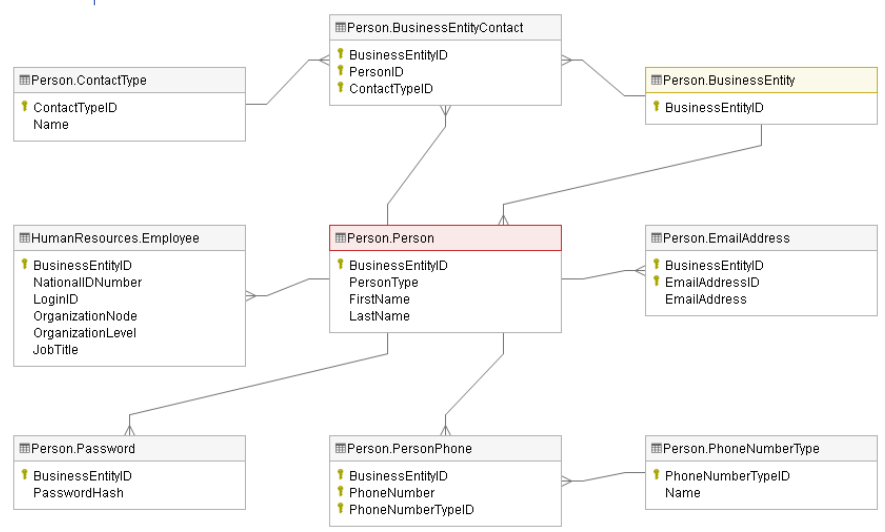

### Human Resources 

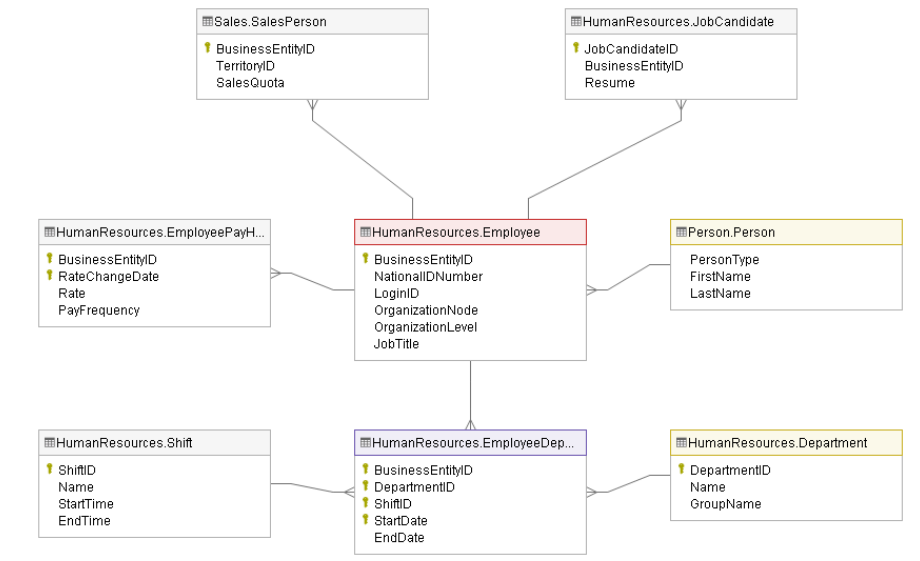

### Products 

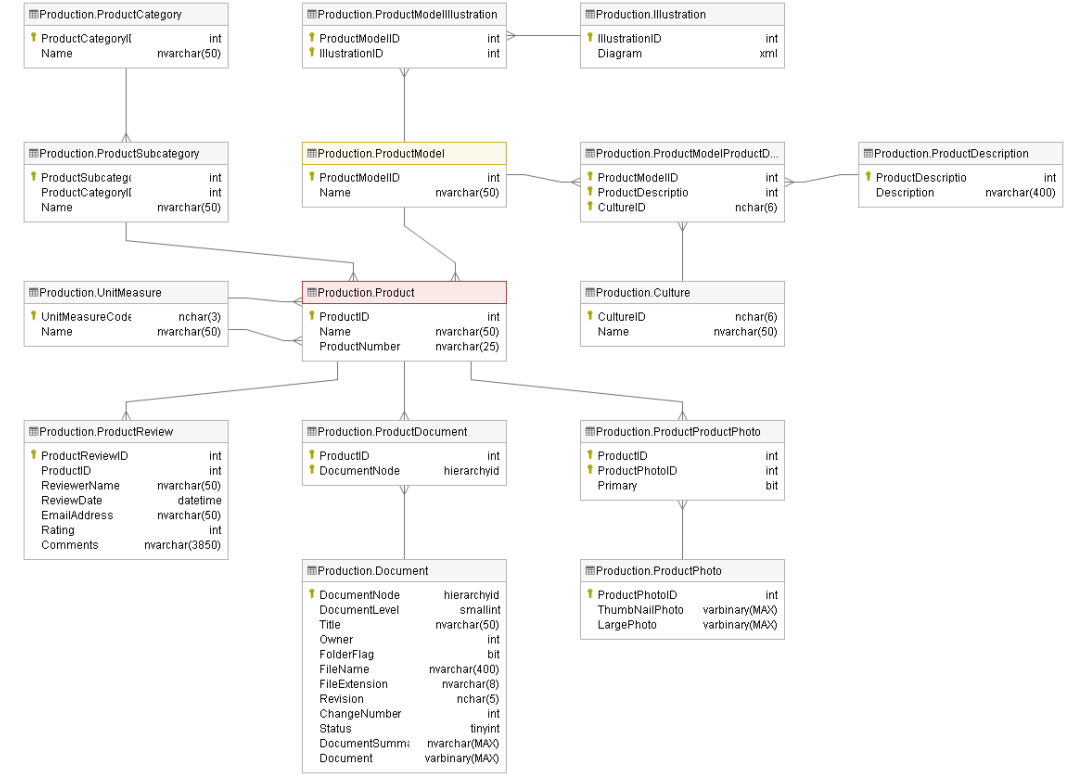

### Manufacturing 

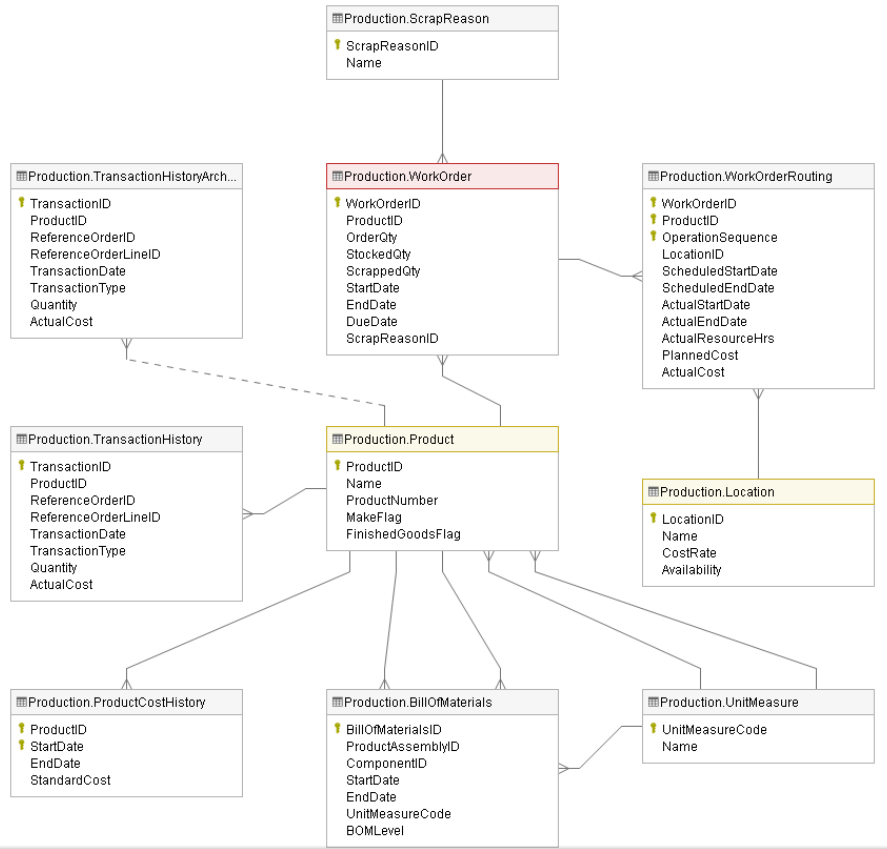

### Purchasing 

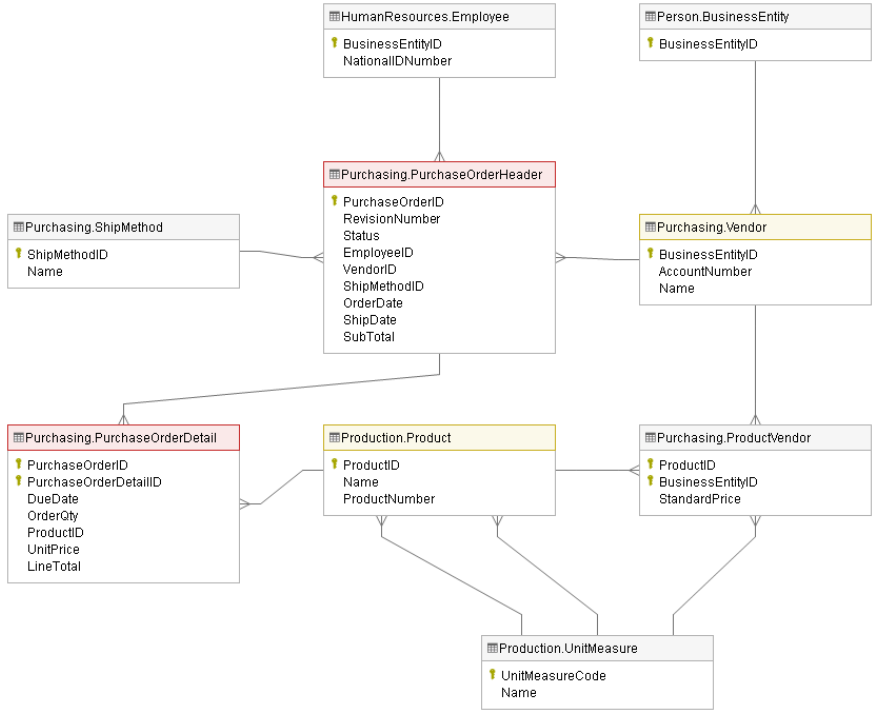

### Inventory 

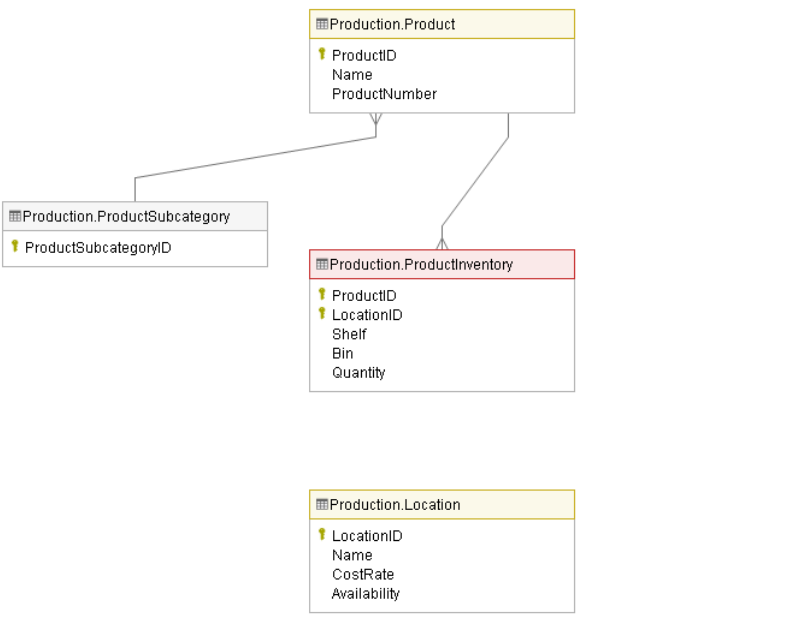

### Sales 




### Importando o banco de dados 

O banco de dados de origem é um banco de dados continuamente atualizado no servidor corporativo da Adventure Works, atualizado por clientes, usuários e funcionários da empresa à medida que novas transações ocorrem.

Este é o banco de dados que utilizaremos na próxima etapa e, é a partir dele que a SCD Type 2  e serão executas com  Delta lake e Spark.

### MySQL Workbench 
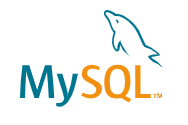

MySQL Workbench é uma ferramenta visual unificada para arquitetos de banco de dados, desenvolvedores e DBAs. O MySQL Workbench fornece modelagem de dados, desenvolvimento de SQL e ferramentas de administração abrangentes para configuração de servidor, administração de usuários, backup e muito mais. O MySQL Workbench está disponível para Windows, Linux e Mac OS X.

Dessa forma, carregamos o banco de dados usando SGBD MySQL usando uma ferramenta de interface gráfica  MySQL Workbench conforme citado anteriormente.

_References_

https://www.mysql.com/products/workbench/

---

### Import 

A figura ilustra o processo da carga do banco de dados usando a interface do Workbench.

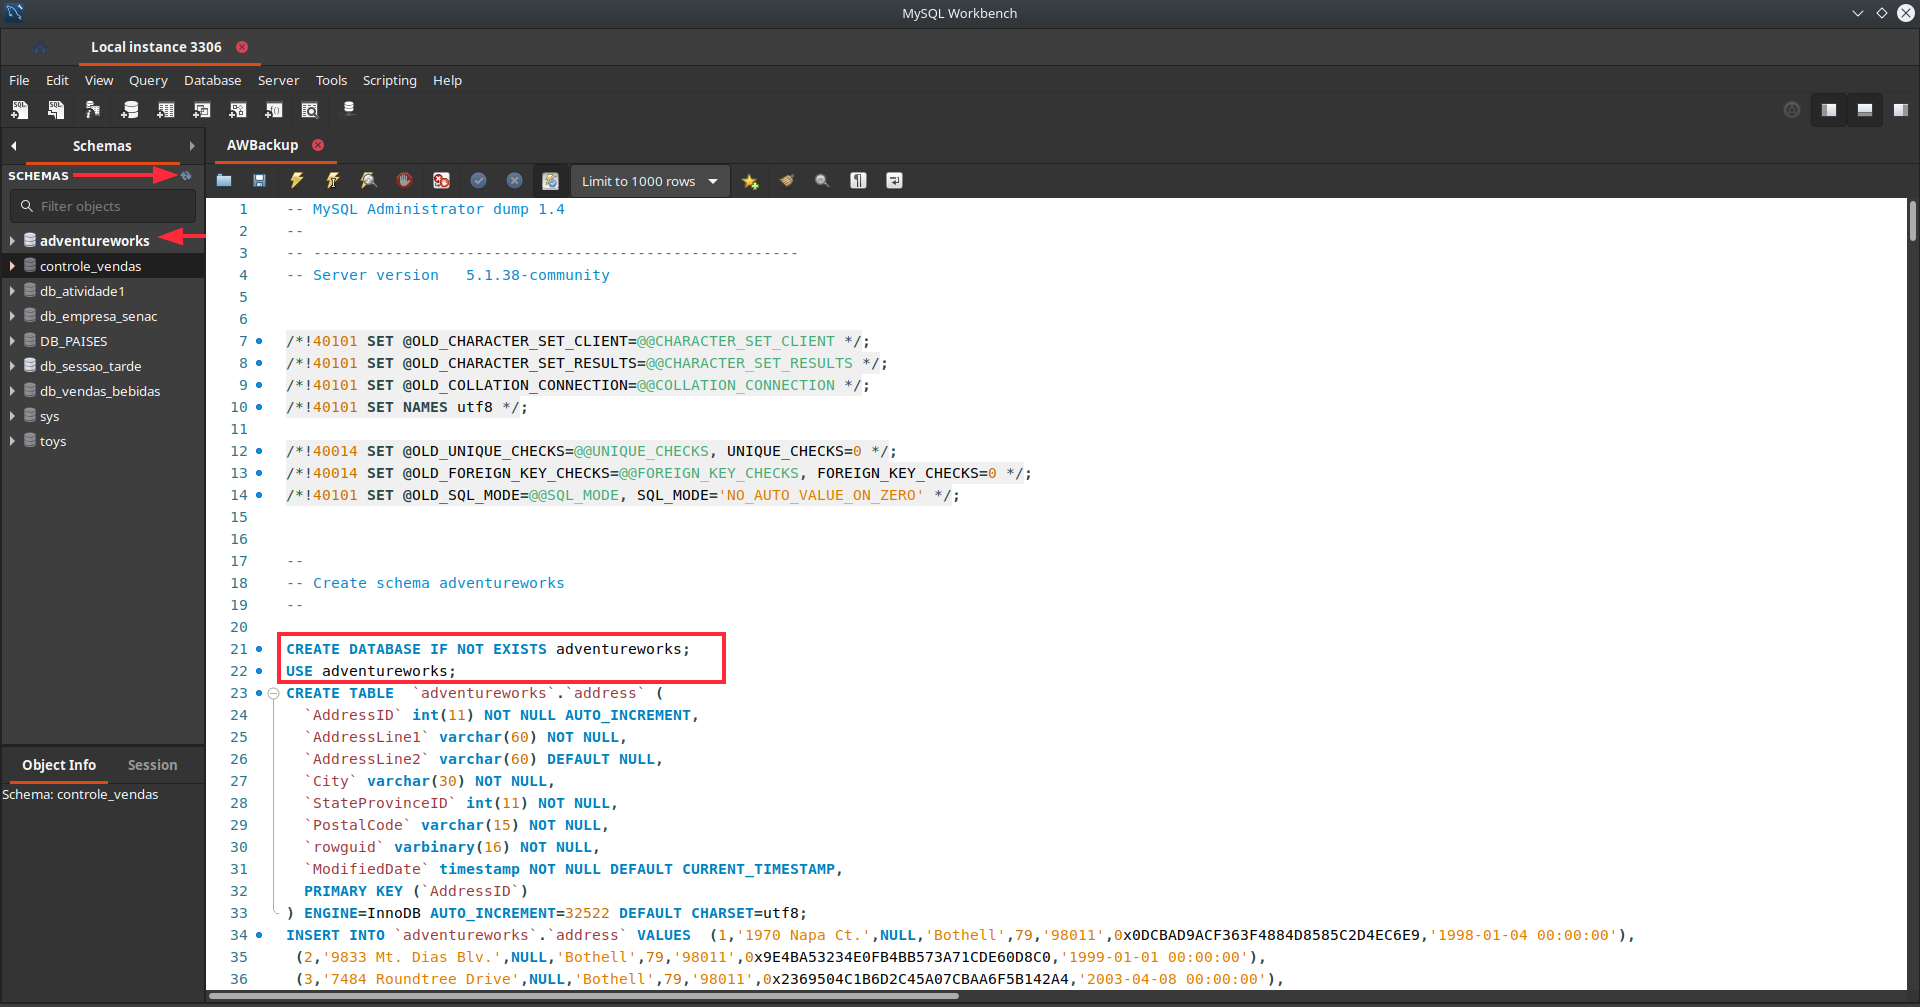

> Source Image : Autor


### Conecte-se ao MySQL no Spark (PySpark)


Existem várias maneiras de se conectar a um banco de dados MySQL no Spark. Esta seção resume algumas abordagens comuns para se conectar ao MySQL usando Python como linguagem de programação.

- Via MySQL JDBC (roda em sistemas que possuem Java runtime); py4j pode ser usado para comunicação entre processos Python e Java.

- Via MySQL ODBC (roda em sistemas que suportam ODBC).

- Através de pacotes Python nativos.

> Fluxo de conectividade 

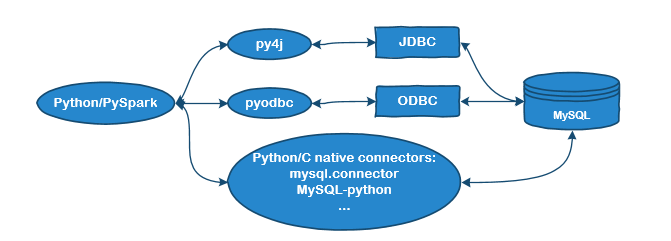

> source: Raymon, 2021
 
Dessa forma, usaremos o pacote python nativo mysql.connector para realiza conexão.     

> O MySQL oferece conectividade com driver de banco de dados padrão (<a href="https://dev.mysql.com/downloads/connector/j/"> consulte Connector/J </a> para obter detalhes) para uso
MySQL com aplicativos e ferramentas compatíveis com os padrões da indústria ODBC e
JDBC. Qualquer sistema que funcione com ODBC ou JDBC pode usar o MySQL.

### MySQL environment

Para ler dados e gravá-los em um banco de dados relacional compatível com JDBC, precisamos
do acesso ao servidor do banco de dados e privilégios suficientes.


- Host: localhost or 127.0.0.1
- Port: (different from default port 3306)
- User: root
- Password: mysql
- Database: adventureworks
- Table: department

_References_

<a href="https://kontext.tech/article/609/connect-to-mysql-in-spark-pyspark#:~:text=Similar%20as%20Connect%20to%20SQL%20Server%20in%20Spark,that%20support%20ODBC%29%203%20Via%20native%20Python%20packages">Connect to MySQL in Spark (PySpark)</a>

---

### Instalando mysql.connector


In [ ]:
# Execute o seguinte comando para instalar o conector Python MySQL
#pip install mysql-connector-python

### SCD Type 2 Implementando  FULL Merge com Delta Lake Table e Spark

### Extração Delta


Antes de mergulhar nos detalhes do Delta Lake para implementação ao projeto, é importante entender os benefícios do Delta Lake. Por exemplo, por que precisamos do Delta Lake?

Existem muitos recursos disponíveis no Delta Lake, mas dois deles são muito importantes conforme descreve (Raymond, 2022) como:

> **Suporte ACID**: Tradicionalmente, quando gravamos dados em um sistema de arquivos usando o Spark, toda a operação de gravação não é atômica. Por exemplo, se o trabalho falhar no meio, os dados na pasta de destino serão corrompidos. A solução geralmente é fazer backup do destino antes de sobrescrever. Com o formato Delta Lake, não precisamos mais nos preocupar com isso. 

> **Declaração de mesclagem**: Em bancos de dados relacionais como SQL Server, Oracle, Teradata, PostgreSQL, etc., podemos usar a instrução MERGE para mesclar dados da tabela de preparação para a tabela de destino (geralmente tabela SCD Type 2).

> **Ingestão de dados de streaming**: A tabela delta pode ser usada como destino para ingestão de streaming, também podemos usar a tabela delta como destino para streaming estruturado do Spark. Isso oferece a oportunidade de unificar o lote e o streaming em um pipeline.

> **Viagem no tempo** : Podemos ler versões mais antigas de dados por meio do recurso de viagem no tempo, pois os dados são armazenados como versões.


Os elementos fundamentais da extração delta é apresentado na figura a seguir:



> source: Raymond,2022)


Ao extrair dados de bancos de dados de origem, geralmente existem três abordagens que (Raymond, 2021) classifica:

- Extração completa:  extrai todos os registros da tabela de origem. Isso geralmente se aplica a tabelas de tamanho pequeno a médio, por exemplo, tabelas de produtos. 

- Extração transacional: extrai todos os novos registros da última extração. Isso é bom para fontes transacionais, como transações bancárias, logs, etc. 

- Extração delta:  extrai todos os registros alterados, incluindo os atualizados, novos e excluídos. Isso pode ser usado para reduzir a quantidade de dados que precisam ser transferidos do sistema de origem para o sistema de destino. Isso geralmente envolve CDC (alterar captura de dados). 

Este diagrama mostra o fluxo de alto nível da extração delta. É muito importante incluir o arquivo de registros excluídos, a menos que sua fonte de dados nunca exclua registros. Se equipe de origem não puder fornecer os registros excluídos,  precisaremos solicitar uma extração completa para poder calcular as alterações comparando com suas tabelas de destino (Raymond, 2021).


_References_ 

https://kontext.tech/diagram/881/data-engineering-delta-extract

---

### Sobre a tabela de Dimensões SCD Type 2 e merge


> Extração e merge completo 

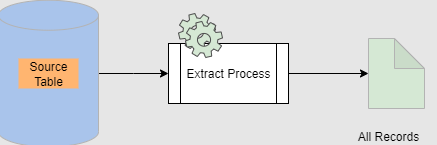
> source: Raymond,2022)

Seguindo análise (Raymond, 2022) como mostra o diagrama acima, uma extração COMPLETA geralmente extrai todos os registros da tabela de origem, ou seja, um instantâneo do conteúdo da tabela como hora da extração. Em comparação com a abordagem de extração DELTA ,não há indicação de registros excluídos. Portanto, para implementar um real merge complento em uma tabela SCD Type2, precisamos comparar com a tabela de destino para identificar os registros excluídos.

Para a versão atual do Delta Lake, não oferece suporte à cláusula NOT MATCHED BY SOURCE; portanto, precisamos fazer essa comparação manualmente.


Além do mais, para configurar um projeto Python, precisamos  instalar o Delta Lake usando pip install delta-spark==2.2.0 e, em seguida, **configurar o SparkSession com a função de utilitário configure_spark_with_delta_pip()** no Delta Lakk

_References_ 

https://kontext.tech/diagram/881/data-engineering-delta-extract

---

### Inicializa uma tabela Delta

In [1]:
## Importando pacotes 

#Importando bibliotecas necessárias para Manipulação dos Sistema Operacional e Python
import sys,os

# Import o findspark e inicializa, ou seja, usa spark a partir do jupyter atual.Em outras plavras, permitimos que o jupyter encontre o spark. 
import findspark
findspark.init()

from __future__ import print_function
from pyspark.sql import SparkSession
from pyspark import SparkContext, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *

# Import conector Python MySQL
import mysql.connector

import pandas as pd

# Import bilbioteca Delta
from delta import *
from delta.tables import *

# Import bibliotecas para manipulação de tempo
from datetime import datetime, timedelta

In [2]:
# Para fins de depuração e demonstração, não há necessidade de trabalhos de produção
def printschema(df):
    df.show(truncate=False)
    df.printSchema()
    print(f'\n count: {df.count()}')
    print(type(df))

In [3]:
# Criar sessão Spark com extensão Delta

builder = SparkSession.builder.appName("PySpark Delta Lake SCD2 Full Merge") \
    .master("local") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")

spark = configure_spark_with_delta_pip(builder).getOrCreate()

#Visualiza o objetvo spark_session
spark

23/02/02 10:33:38 WARN Utils: Your hostname, rogstrixb460g resolves to a loopback address: 127.0.1.1; using 192.168.0.40 instead (on interface eno1)
23/02/02 10:33:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.0-rc1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/helber/.ivy2/cache
The jars for the packages stored in: /home/helber/.ivy2/jars
io.delta#delta-core_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-1b0ff7b4-ddc4-45c2-aae7-487b7c448dac;1.0
	confs: [default]
	found io.delta#delta-core_2.12;2.2.0 in central
	found io.delta#delta-storage;2.2.0 in central
	found org.antlr#antlr4-runtime;4.8 in central
:: resolution report :: resolve 142ms :: artifacts dl 5ms
	:: modules in use:
	io.delta#delta-core_2.12;2.2.0 from central in [default]
	io.delta#delta-storage;2.2.0 from central in [default]
	org.antlr#antlr4-runtime;4.8 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   3   |   0   |   0

23/02/02 10:33:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


### Leitura da tabela do Database AdventureWorks

In [4]:
# Establish a connection
conn = mysql.connector.connect(user='root', database='adventureworks',
                               password='mysql',
                               host="localhost",
                               port=3306)
'''
Usamos o cursor, para navegamos pelas tabelas, aos metadados,bem como, aplicamos uma séries de ativadades direto no SGBD
'''
#Abre um cursor
cursor = conn.cursor()
query = "select * FROM department"

# Create a pandas dataframe
pdf = pd.read_sql(query, con=conn)
conn.close()

# Convert Pandas dataframe to spark DataFrame
df = spark.createDataFrame(pdf)
printschema(df)

+------------+--------------------------+------------------------------------+-------------------+
|DepartmentID|Name                      |GroupName                           |ModifiedDate       |
+------------+--------------------------+------------------------------------+-------------------+
|1           |Engineering               |Research and Development            |1998-06-01 00:00:00|
|2           |Tool Design               |Research and Development            |1998-06-01 00:00:00|
|3           |Sales                     |Sales and Marketing                 |1998-06-01 00:00:00|
|4           |Marketing                 |Sales and Marketing                 |1998-06-01 00:00:00|
|5           |Purchasing                |Inventory Management                |1998-06-01 00:00:00|
|6           |Research and Development  |Research and Development            |1998-06-01 00:00:00|
|7           |Production                |Manufacturing                       |1998-06-01 00:00:00|
|8        

### Create temporary  

Criamos uma tabela temporária para executar consultas SQL nos dados. A table temporária existe somente nesta sessão.Em outras palavras, simplesmente pegamos um dataframe e criamos uma outra estrutura na memória do computador e colocamos os dados no formato que seja possível para maninpulação de dados em sql.

Assim sendo, motivo é porque não conseguirmos manipular queries sql direto em um dataframe.
No entanto, se volume de dados for muito grande isso pode gera problemas.

Para executar consultas SQL completas em um DataFrame, primeiro temos que
registra o DataFrame como uma tabela:
    
- DataFrame.createOrReplaceTempView(<your-desired-table-name>)

Dessa forma, conseguimos então executar consultas SQL regulares nele, como se fosse um relacional
tabela do banco de dados:

### Inicializando uma table Delta

Para implementa o SCD Type 2 de forma eficiente, precisamos incluir mais três atributos, como **StartDate, EndDate e IsCurrent**, conforme apresentado no trecho do código a seguir.


In [5]:
# Criando um table temporay e, em seguida, usados em instruções SQL:

# Leitura da tabela departament do db Adventure Wworks
df.createOrReplaceTempView("department")
department= spark.sql("select * from department")

#Adicionar colunas padrão de sistema/controle por especificações SCD type 2

#date_start = department.select(col("ModifiedDate"))
date_start =datetime.now()
date_end = datetime.strptime('9999-12-31 23:59:59.999', '%Y-%m-%d %H:%M:%S.%f')
is_current= 1

'''
Asim, podemos usar o DataFrame.withColumn() do Spark para adicionar uma nova coluna/recurso.
Assim como, o código a seguir incializara  SDC type 2 no spark Dataframe
'''
department = department.withColumn('IsCurrent', lit(is_current)).withColumn('DateEnd', lit(date_end))
#debug
printschema(department)

+------------+--------------------------+------------------------------------+-------------------+---------+-----------------------+
|DepartmentID|Name                      |GroupName                           |ModifiedDate       |IsCurrent|DateEnd                |
+------------+--------------------------+------------------------------------+-------------------+---------+-----------------------+
|1           |Engineering               |Research and Development            |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|2           |Tool Design               |Research and Development            |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|3           |Sales                     |Sales and Marketing                 |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|4           |Marketing                 |Sales and Marketing                 |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|5           |Purchasing                |Inventory Management        

Neste DataFrame, a coluna DepartmentID é PrimaryKey para relacionamento entre tables. A coluna **is_current** é o sinalizador para **indicar se os registros estão ativos no momento**. Como carregamento inicial, **DateEnd** é definido como um carimbo de data/hora.Em poucas palavras, o dataframe que criamos aqui já representa a tabela de dimensões do banco de dados de **department.**

O DataFrame é finalmente salvo como uma tabela Delta Lake no Data lake, ou seja, no  sistema de arquivos hdfs a seguir. Usaremos essa tabela delta como destino para **merge completo**.

### Gravando a table como DeltaTable no hdfs

Por mais, vamos salvar o dataframe do spark com dados de origem e fingir que ela está no Delta Lake como uma tabela de dimensões há muito tempo.Antes disso, devemos inicializa hdfs e criar o seus repectivos diretórios.
 
Para instalação do hadoop usado no projeto.Basta acessa a documentação  que ilustra o passo-a-passo do processo  de instalação <a href="https://hadoop.apache.org/docs/r3.2.4/hadoop-project-dist/hadoop-common/SingleCluster.html" target="_blank">documentação</a>

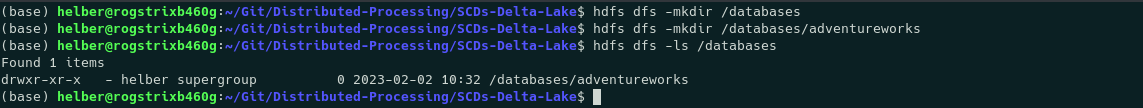

In [6]:
# path
delta_table = 'hdfs://localhost:9000/databases/adventureworks'

# Salva tabela inicial como tabela no hdfs
department.write.format("delta").save(delta_table)

'''
delta_table a princípio é uma string contendo o caminho delta lake,então criamos um objeto de tabela delta tentando passá-lo para o método .load ().
Separar essas variáveis pode ajudar:

Em outras palavras, é classe principal para interagir programaticamente com tabelas Delta. Ou seja, podemos criar instâncias DeltaTable usando o caminho da tabela Delta.
'''
department_table= DeltaTable.forPath(spark, delta_table)

23/02/02 10:34:09 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


Dessa forma, no Data Lake  HDFS, um novo arquivo de **log delta** e um novo arquivo parquet são adicionados.Portanto, já temos nosso Data Lake funcionando para aplicabilidade da SCD Type 2,a figura seguir ilustra os arquivo criados.

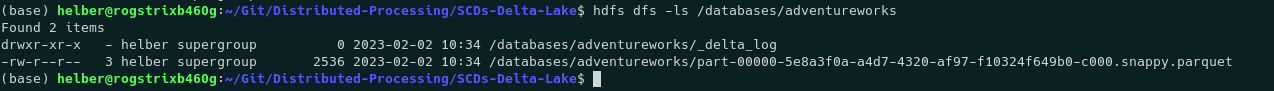

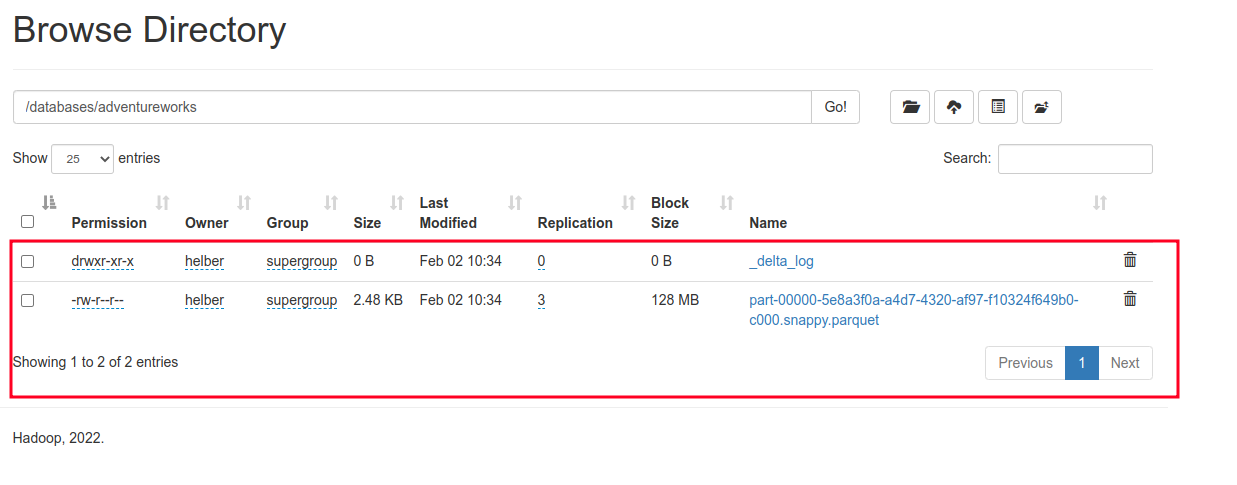



### Criando um DataFrame/tabela de preparo (área de preparação)

O DataFrame de preparação representa a extração COMPLETA da origem (instantâneo da tabela de origem).Dessa forma, adicionamos valores codificados para facilitar merge posterior. 

In [7]:
# data input
data_input = [ (4,"CMO - Chief Marketing Officer","Sales and Marketing",None),
               (9, "CHRO - Chief Human Resources Officer","Executive General and Administration",None),
               (10,"CFO - Chief Financial Officer","C-level executives", None),
               (16,"CXO - Chief Exponencial Officer","C-level executives", None)]

# define schema
schema_input= StructType([StructField("DepartmentID", IntegerType(), True),
            StructField("Name", StringType(), True),
            StructField("GroupName", StringType(), True),
            StructField("ModifiedDate",TimestampType(),True),
            ])
# cria dataframe de preparo
df_stg = spark.createDataFrame(data_input,schema_input)
printschema(df_stg)

+------------+------------------------------------+------------------------------------+------------+
|DepartmentID|Name                                |GroupName                           |ModifiedDate|
+------------+------------------------------------+------------------------------------+------------+
|4           |CMO - Chief Marketing Officer       |Sales and Marketing                 |null        |
|9           |CHRO - Chief Human Resources Officer|Executive General and Administration|null        |
|10          |CFO - Chief Financial Officer       |C-level executives                  |null        |
|16          |CXO - Chief Exponencial Officer     |C-level executives                  |null        |
+------------+------------------------------------+------------------------------------+------------+

root
 |-- DepartmentID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- GroupName: string (nullable = true)
 |-- ModifiedDate: timestamp (nullable = true)


 count:

In [8]:
# Adicionar as colunas padrão sistema/controle por especificações SCD type 2
df_stg=df_stg.withColumn('ModifiedDate', lit(date_start))\
                    .withColumn('DateEnd', lit(date_end))\
                    .withColumn('MergeKey', df_stg['DepartmentID'])\
                    .withColumn('action', lit('U'))
# Armazene-o em cache, pois o usaremos em várias ações
df_stg.cache()
# debug
printschema(df_stg)

+------------+------------------------------------+------------------------------------+--------------------------+-----------------------+--------+------+
|DepartmentID|Name                                |GroupName                           |ModifiedDate              |DateEnd                |MergeKey|action|
+------------+------------------------------------+------------------------------------+--------------------------+-----------------------+--------+------+
|4           |CMO - Chief Marketing Officer       |Sales and Marketing                 |2023-02-02 10:33:44.656019|9999-12-31 23:59:59.999|4       |U     |
|9           |CHRO - Chief Human Resources Officer|Executive General and Administration|2023-02-02 10:33:44.656019|9999-12-31 23:59:59.999|9       |U     |
|10          |CFO - Chief Financial Officer       |C-level executives                  |2023-02-02 10:33:44.656019|9999-12-31 23:59:59.999|10      |U     |
|16          |CXO - Chief Exponencial Officer     |C-level execu

A coluna ação é usada para indicar que a **action** precisa ser aplicada posteriormente no merge. O padrão é 'U' (Atualizações), embora nem todos os registros sejam atualizados posteriormente. Os possíveis valores para coluna **action** que serão utilizados posteriormente são:

- U - Atualizações
- I - Inserções
- D - Excluir

Assim como, também adicionamos uma coluna chamada **MergeKey chave composta** que será usada para ingressar na tabela de destino.

### Preparado um DataFrame de origem para Merge

#### Comparar novos registros com registros existentes na tabela de dimensões

Em primeiro lugar, precisamos verificar os novos e deletados registros recebidos da tabela de dimensões existente e verificar se eles serão adicionados atualizando os existentes ou adicionados diretamente como novos registros na tabela de destino, e também descobriremos os excluídos.Dessa forma, adicionamos nesta etapa um dataframe.O trecho de código a seguir cria um DataFrame que inclui os seguintes registros:


- Registros com novas chaves de negócios que precisarão ser inseridos.

- Registros que foram excluídos na tabela de origem.

- Registros que são atualizados, que expiram os registros atuais ativos e inserem 
novos. Para esse caso, significa qualquer registro com nome de coluna atualizado.

In [9]:
# Descubra os registros que precisam ser inseridos ou excluídos;
df_inserts_deletes = df_stg.alias('stg').join(department_table.toDF().alias('dpt'), on='DepartmentID', how='full')\
    .where("""(dpt.IsCurrent=1 AND dpt.Name <> stg.name OR dpt.GroupName <> stg.GroupName OR dpt.ModifiedDate <> stg.ModifiedDate) 
    OR dpt.DepartmentID is null OR stg.MergeKey is null""") \
    .select("DepartmentID","stg.Name", "stg.GroupName","stg.ModifiedDate","stg.DateEnd",
                expr("""case when dpt.IsCurrent is null OR dpt.Name <> stg.Name OR dpt.GroupName <> stg.GroupName then 'I' 
                 when stg.MergeKey is null then 'D' end as action"""),
                expr("""case when dpt.IsCurrent is null OR dpt.Name <> stg.Name OR dpt.GroupName <> stg.GroupName then NULL
                        when stg.MergeKey is null then DepartmentID else stg.MergeKey end as MergeKey"""))
# debug
printschema(df_inserts_deletes)

+------------+------------------------------------+------------------------------------+--------------------------+-----------------------+------+--------+
|DepartmentID|Name                                |GroupName                           |ModifiedDate              |DateEnd                |action|MergeKey|
+------------+------------------------------------+------------------------------------+--------------------------+-----------------------+------+--------+
|1           |null                                |null                                |null                      |null                   |D     |1       |
|2           |null                                |null                                |null                      |null                   |D     |2       |
|3           |null                                |null                                |null                      |null                   |D     |3       |
|4           |CMO - Chief Marketing Officer       |Sales and Mar

Como queremos que esses registros sejam adicionados após merge, deixamos sua MergeKey nula.

Assim sendo, temos:

Output:

- Teremos que inserir novos registro ModiefiedDate(data início) para os department 4,9,10,16.Esses registros serão adicionados diretamente em qualquer caso.

- Restante serão excluidos.


Este DataFrame por si só não é suficiente para um único merge com a delta table (dimensão Delta lake), pois também precisamos que os registros correspondam aos registros que precisam ser expirados da tabela (department). Portanto, criamos um DataFrame de origem final usando este DataFrame com o DataFrame de preparação.Dessa maneira, será possível não excluir os antigos e adicionar os novos.

In [10]:
# Crie uma tabela de preparação final como src para merge
df_src = df_inserts_deletes.unionByName(df_stg)
df_src = df_src.withColumn('DateEnd',expr("""case when action='U' 
            then ModifiedDate - interval 0.001 seconds else DateEnd end """))
#debug
printschema(df_src)

+------------+------------------------------------+------------------------------------+--------------------------+--------------------------+------+--------+
|DepartmentID|Name                                |GroupName                           |ModifiedDate              |DateEnd                   |action|MergeKey|
+------------+------------------------------------+------------------------------------+--------------------------+--------------------------+------+--------+
|1           |null                                |null                                |null                      |null                      |D     |1       |
|2           |null                                |null                                |null                      |null                      |D     |2       |
|3           |null                                |null                                |null                      |null                      |D     |3       |
|4           |CMO - Chief Marketing Officer   

### Implementando full merge

Agora vamos puxar inserções, atualizações ativas e atualizações inativas em um único dataframe com merge.Teremos este dataframe como uma fonte delta para a lógica final de gravação no Data Lake hdfs.

Usando a API de MERGE para mesclar na tabela delta de destino:

- merge(fonte, condição)

Mescle dados do DataFrame de origem com base na condição de mesclagem fornecida. Isso retorna um objeto DeltaMergeBuilder que pode ser usado para especificar as ações de atualização, exclusão ou inserção a serem executadas em linhas com base no fato das linhas corresponderem à condição ou não. Consulte DeltaMergeBuilder para obter uma descrição completa dessa operação e quais combinações de operações de atualização, exclusão e inserção são permitidas.

_References_

https://docs.delta.io/0.4.0/api/python/index.html#module-delta.tables

---

In [19]:
# Merge into 
merge =department_table.alias("dpt").merge(df_src.alias("src"), "src.MergeKey = dpt.DepartmentID")\
    .whenMatchedUpdate(condition="dpt.IsCurrent=1 AND src.Name <> dpt.Name OR src.GroupName <> dpt.GroupName",
                           set={"IsCurrent": lit(0),
                                "DateEnd": col('src.ModifiedDate') # Defina IsCurrent como false e DateEnd como a data efetiva da fonte.
                               }
                      )\
    .whenMatchedUpdate(condition="dpt.IsCurrent=1 AND src.action='D'",
                           set={"IsCurrent": lit(0),
                                "DateEnd":expr('current_timestamp')
                               }
                      )\
    .whenNotMatchedInsert(values={"DepartmentID": col("src.DepartmentID"),
                                      "Name": col("src.Name"),
                                      "GroupName": col("src.GroupName"),
                                      "ModifiedDate": col("src.ModifiedDate"),
                                      "IsCurrent": lit(1), #Defina IsCurrent como verdadeiro junto com novo registro e sua data efetiva.
                                      "DateEnd": col("src.DateEnd")
                                      })
# Execute the merge
merge.execute()

department_table.toDF().orderBy('DepartmentID','ModifiedDate','IsCurrent').show(truncate=False)

+------------+------------------------------------+------------------------------------+--------------------------+---------+--------------------------+
|DepartmentID|Name                                |GroupName                           |ModifiedDate              |IsCurrent|DateEnd                   |
+------------+------------------------------------+------------------------------------+--------------------------+---------+--------------------------+
|1           |Engineering                         |Research and Development            |1998-06-01 00:00:00       |0        |2023-02-02 10:46:23.473113|
|2           |Tool Design                         |Research and Development            |1998-06-01 00:00:00       |0        |2023-02-02 10:46:23.473113|
|3           |Sales                               |Sales and Marketing                 |1998-06-01 00:00:00       |0        |2023-02-02 10:46:23.473113|
|4           |Marketing                           |Sales and Marketing            

Há alguns pontos a serem observados:

- A cláusula WHEN MATCHED / WHEN NOT MATCHED é principal responsável pelas
comparações entre tabelas que fazem a comparação funcionar
entre a tabela de origem e a tabela de destino de forma ágil, de onde tomamos medidas para ajustar
dimensões do Data lake.

- A condição de junção está na coluna MergeKey.

- Para o primeiro whenMatchedUpdate, atualizamos o sinalizador is_current para 0 e também definimos o DateEnd como um milissegundo a menos que a ModiefiedDate do novo registro.

- Para o segundo whenMatchedUpdate, ele exclui suavemente o registro ativo atual e aplica DateEnd como carimbo de data/hora atual.

- A última cláusula simplesmente insere os registros que precisam ser inseridos (incluindo os atualizados e também os recém-adicionados).



Observando as alterações processadas na tabela de dimensões (DeltaTable), a figura ilustra a inclusão de novo arquivo parquet.

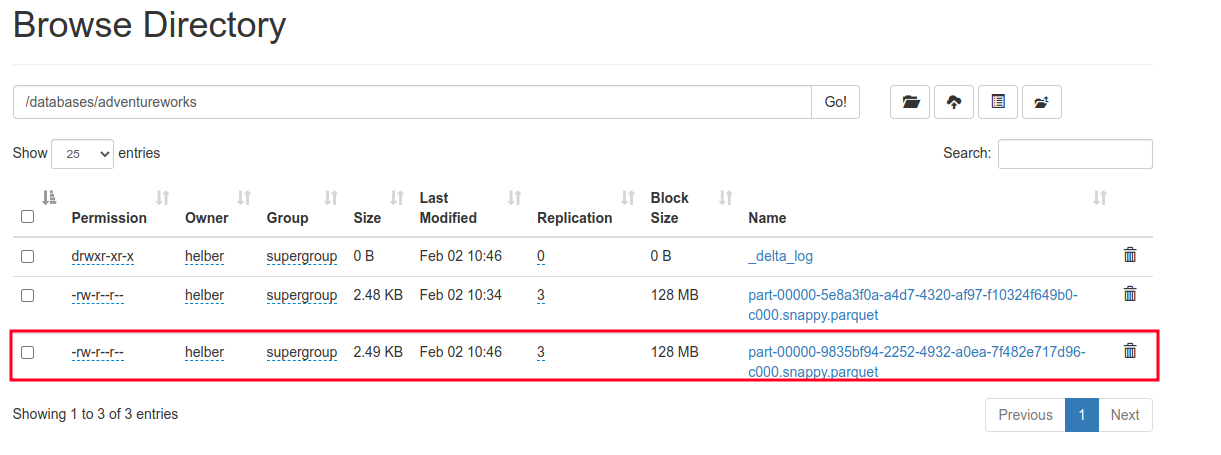

### Leitura da tabela DeltaTable no Data Lake

In [14]:
department_delta=spark.read.parquet("hdfs://localhost:9000/databases/adventureworks/part-00000-5e8a3f0a-a4d7-4320-af97-f10324f649b0-c000.snappy.parquet")
printschema(department_delta)

+------------+--------------------------+------------------------------------+-------------------+---------+-----------------------+
|DepartmentID|Name                      |GroupName                           |ModifiedDate       |IsCurrent|DateEnd                |
+------------+--------------------------+------------------------------------+-------------------+---------+-----------------------+
|1           |Engineering               |Research and Development            |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|2           |Tool Design               |Research and Development            |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|3           |Sales                     |Sales and Marketing                 |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|4           |Marketing                 |Sales and Marketing                 |1998-06-01 00:00:00|1        |9999-12-31 23:59:59.999|
|5           |Purchasing                |Inventory Management        

### Leitura da table deltaTable com alterações SCD2

In [17]:
department_SCD2=spark.read.parquet("hdfs://localhost:9000/databases/adventureworks/part-00000-9835bf94-2252-4932-a0ea-7f482e717d96-c000.snappy.parquet")
printschema(department_SCD2)

+------------+------------------------------------+------------------------------------+--------------------------+---------+--------------------------+
|DepartmentID|Name                                |GroupName                           |ModifiedDate              |IsCurrent|DateEnd                   |
+------------+------------------------------------+------------------------------------+--------------------------+---------+--------------------------+
|4           |CMO - Chief Marketing Officer       |Sales and Marketing                 |2023-02-02 10:33:44.656019|1        |9999-12-31 23:59:59.999   |
|9           |CHRO - Chief Human Resources Officer|Executive General and Administration|2023-02-02 10:33:44.656019|1        |9999-12-31 23:59:59.999   |
|10          |CFO - Chief Financial Officer       |C-level executives                  |2023-02-02 10:33:44.656019|1        |9999-12-31 23:59:59.999   |
|16          |CXO - Chief Exponencial Officer     |C-level executives             

### Summary

Neste projeto a principal abstração para chegar o seu nível máximo, foi é a conscientização dos conceitos relacionados ao design Data Warehousings e mecanismos de computação para implmentação SCD Type 2 com Delta lake e Spark.
